# Overview of `mobile-env:smart-city` for Smart City Simulation and Digital Twin Synchronization

`mobile-env:smart-city` is an open-source Python environment designed for simulating decentralized Metaverse environments. It provides a flexible and extendable platform for experimenting resource optimization with reinforcement learning (RL) and control algorithms in dynamic environments.

By enabling simulations with moving users, stationary sensors, and flexible configurations, `mobile-env:smart-city` allows the users to model realistic scenarios, assess the efficiency of resource utilization and fine-tune algorithms for real-time synchronization between a digital twin and the actual environment.

## Key Features of `mobile-env:smart-city`

* **Flexibility and Customizability**:
   - `mobile-env:smart-city` is written entirely in Python, making it easy to modify and extend.
   - The environment allows the simulation of a smart city scenario with mobile users (UEs), stationary sensors and a single base station (BS).
   - The number of UEs, sensors, their movement patterns, communication properties and the structure of the network can all be customized to suit a variety of experimental needs.

* **Compatibility with Gymnasium**:
   - `mobile-env:smart-city` adheres to the [Gymnasium](https://gymnasium.farama.org/) (formerly [OpenAI Gym](https://gym.openai.com/)) interface. This ensures compatibility with most reinforcement learning libraries and frameworks, allowing users to experiment with different RL algorithms with minimal integration effort.
   - Using the Gymnasium interface allows easy integration with popular RL libraries such as Stable-Baselines3, RLlib, or custom-built agents.

* **Not Limited to RL**:
   - While the environment is designed with RL in mind, `mobile-env:smart-city` is not restricted to RL algorithms. It can also be used to implement and test conventional control policies or simple rule-based benchmark algorithms. This flexibility enables users to benchmark RL algorithms against traditional approaches.

* **Realistic Network Simulation**:
   - The environment includes realistic simulations of mobile user equipment (UEs), cellular network base stations (BS) and sensors. 
   - UEs move dynamically and their communication quality (e.g., signal-to-noise ratio) changes based on their position relative to the base station. 
   - The scenarios are focused on exploring dynamic resource allocation in cellular networks for smart city applications.

* **Extensibility**:
   - Developers can easily extend the functionality of `mobile-env:smart-city` by modifying or adding custom observation spaces, action spaces or reward functions.
   - It allows simulation of dynamic scenarios, for example, by implementing custom movement patterns for UEs, different scheduling policies for base stations or adding new types of observations and rewards based on the needs of the experiment.

## Use Case for `mobile-env:smart-city`

This environment provides a platform for testing and evaluating resource allocation strategies, network control algorithms and Metaverse-related optimizations in a smart city environment. Reinforcement learning agents can be trained and evaluated in the environment to dynamically manage resources such as bandwidth and computational power for multiple devices and sensors. 

Its flexibility, ease of use and compatibility with Gymnasium make it an ideal tool for working on smart city or decentralized Metaverse applications.

## Customized gymnasium environment: `mobile-env:smart-city`

**Demonstration Steps:**

This demonstration consists of the following steps:

1. Installation and usage of `mobile-env:smart-city` with dummy actions
2. Configuration of `mobile-env:smart-city` and adjustment of the observation space

In additional notebooks within this project, you will find implementations of both a baseline scenario and a reinforcement learning (RL) approach for comparison. 

- The **baseline scenario** employs fixed policy splits and conventional control methods to allocate resources, providing a straightforward comparison point for evaluating the benefits of RL. 
- The **RL approach**, on the other hand, uses dynamic decision-making to optimize resource allocation in response to changing network conditions. 

By examining these two approaches side by side, we can assess the effectiveness and adaptability of RL algorithms over traditional static policies, providing insights into their potential for complex, dynamic environments like smart cities.

### Step 1: Installation and usage of `mobile-env:smart-city`

#### Importing necessary libraries:

- `gymnasium` is the core framework for creating and using custom environments
- `mobile_env` is the custom environment that we're demonstrating
- `matplotlib` is used for visualizing the environment's state

In [1]:
# Step 1: Import necessary libraries

import gymnasium as gym

# importing mobile_env automatically registers the predefined scenarios in Gym
import mobile_env

import matplotlib.pyplot as plt

In [2]:
# predefined smart city scenario
from mobile_env.scenarios.smart_city import MComSmartCity

# easy access to the default smart city configuration, parameters and settings
MComSmartCity.default_config()

{'width': 200,
 'height': 200,
 'EP_MAX_TIME': 100,
 'seed': 666,
 'reset_rng_episode': False,
 'arrival': mobile_env.core.arrival.NoDeparture,
 'channel': mobile_env.core.channels.OkumuraHata,
 'scheduler': mobile_env.core.schedules.RoundRobinBandwidth,
 'movement': mobile_env.core.movement.RandomWaypointMovement,
 'utility': mobile_env.core.utilities.BoundedLogUtility,
 'handler': mobile_env.handlers.smart_city_handler.MComSmartCityHandler,
 'bs': {'bw': 100000000.0,
  'freq': 2500,
  'tx': 40,
  'height': 50,
  'computational_power': 100},
 'ue': {'velocity': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09, 'height': 1.5},
 'sensor': {'height': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09},
 'ue_job': {'job_generation_probability': 0.7,
  'communication_job_lambda_value': 10.0,
  'computation_job_lambda_value': 10.0},
 'sensor_job': {'communication_job_lambda_value': 5.0,
  'computation_job_lambda_value': 5.0},
 'e2e_delay_threshold': 3.0,
 'reward_calculation': {'ue_penalty': -5.0,
  'discount_factor

#### Environment Registration

In Gymnasium, registering a new environment is essential when defining a custom environment that can be accessed easily and used with various reinforcement learning frameworks.

In [3]:
from gymnasium.envs.registration import register

# Register the new environment
register(
    id='mobile-smart_city-smart_city_handler-v0',
    entry_point='mobile_env.scenarios.smart_city:MComSmartCity',
    kwargs={'config': {}, 'render_mode': None}
)

/Users/elifohri/Library/Python/3.9/lib/python/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment mobile-smart_city-smart_city_handler-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [4]:
# List all registered environments
env_specs = gym.envs.registry.keys()
print(f"Env specs: {env_specs}")

# Verify if specific environment is listed
assert 'mobile-smart_city-smart_city_handler-v0' in env_specs, "Environment not registered correctly"
print("Environment 'mobile-smart_city-smart_city_handler-v0' registered successfully!")

Env specs: dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'CartPoleJax-v0', 'CartPoleJax-v1', 'PendulumJax-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Jax-Blackjack-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0', 'mobile-smart_city-smart_city_handler-v0'])
Environment 'mobile-smart_city-smart_city_handler-v0' reg

### Step 2: Extending `mobile-env:smart-city` and tracking custom metrics

`mobile-env:smart-city` allows to define and track custom metrics during the training and testing phases in reinforcement learning (RL). This is essential for evaluating and understanding how well RL agents and different baseline policies perform in a decentralized smart city scenario.

It defines an interface for metrics that record values per user equipment and per sensor (e.g. utility per device), basestation (e.g. number of connections per station) or time step (e.g. average utility of device).

**The following key performance indicators (KPIs) are monitored:**

- **Number of connections:** Tracks the total number of active user and sensor connections in the network.
- **Utility metrics:** Measures the utility of user equipments (UEs) and sensors in terms of network performance.
- **Distance to base stations:** Monitors how far UEs and sensors are from the base station, which is essential to understand their connectivity strength.
- **Signal-to-Noise Ratio (SNR):** Measures the quality of the connection between UEs/sensors and base stations.
- **Throughput:** Calculates the data transfer rate for UEs and sensors, as well as for the base station.
- **Bandwidth and computational resource utilization:** Monitors how much of the available bandwidth and computational power is being used by UEs and sensors.

Later, we load the monitored metrics as `pandas` data frames.

#### Environment Creation

Create the simulation environment using the `make()` function, which instantiates the "smart-city" scenario with the configuration specified by the config parameter.

In [5]:
# create a small mobile environment for a single, centralized control agent
# pass rgb_array as render mode so the env can be rendered inside the notebook
env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 20 sensors and 1 cells.


#### Environment Data

In [6]:
obs, info = env.reset()
print("obs:", obs)
print("info:", info)

print("\nMetadata")
print("metadata:", env.metadata)

print("\nRender Modes")
print("render modes:", env.render_mode)

print("\nSpec:")
print("spec:", env.spec)

print("\nAction Space")
print("action space:", env.action_space)
print("action space shape:", env.action_space.shape)
print("simple action:", env.action_space.sample())

print("\nObservation Space")
print("observation space:", env.observation_space)
print("observation space shape:", env.observation_space.shape)
print("sample observation:", env.observation_space.sample())

print("\nReward Range")
print("reward range:", env.reward_range)


obs: [0. 0. 0. 0.]
info: {'time': 0.0, 'reward': 0, 'delayed UE jobs': 0, 'aori': {0: None, 1: None, 2: None, 3: None, 4: None}, 'aosi': {0: None, 1: None, 2: None, 3: None, 4: None}, 'bs trans. ue': {0: 0}, 'bs trans. ss': {0: 0}, 'bs accomp. us': {0: 0}, 'bs accomp. ss': {0: 0}}

Metadata
metadata: {'render_modes': ['rgb_array', 'human']}

Render Modes
render modes: rgb_array

Spec:
spec: EnvSpec(id='mobile-smart_city-smart_city_handler-v0', entry_point='mobile_env.scenarios.smart_city:MComSmartCity', reward_threshold=None, nondeterministic=False, max_episode_steps=None, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'config': {}, 'render_mode': 'rgb_array'}, namespace=None, name='mobile-smart_city-smart_city_handler', version=0, additional_wrappers=(), vector_entry_point=None)

Action Space
action space: Box(0.0, 1.0, (2,), float32)
action space shape: (2,)
simple action: [0.5231405 0.9569909]

Observation Space
observation spa

### Step 3: Demo with Dummy Actions

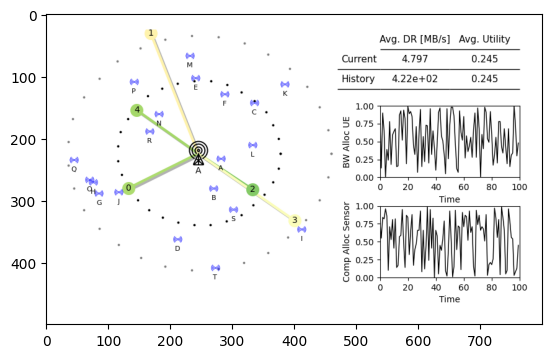

In [7]:
from IPython import display

done = False
obs, info = env.reset()

for step in range(100):
    # here, use random dummy actions by sampling from the action space
    dummy_action = env.action_space.sample()
    #dummy_action = (0.5, 0.5)
    obs, reward, terminated, truncated, info = env.step(dummy_action)

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True) 
    
plt.close()

In [8]:
# load all tracked results as pandas data frames
scalar_results, kpi_results, ue_results, bs_results, ss_results = env.monitor.load_results()

# show general results
scalar_results

number UE connections  number sensor conncections  \
Time Step                                                      
0                              5                          20   
1                              5                          20   
2                              5                          20   
3                              5                          20   
4                              5                          20   
...                          ...                         ...   
95                             5                          20   
96                             5                          20   
97                             5                          20   
98                             5                          20   
99                             5                          20   

           total traffic request ue  total traffic request sensor  \
Time Step                                                           
0                         16.861722                     97.701656   
1                         55.044122                    147.927191   
2                         80.191688                    270.825629   
3                        109.071238                    341.773123   
4                        142.070983                    330.624329   
...                             ...                           ...   
95                       632.831639                   6526.216614   
96                       650.132858                   6627.146740   
97                       663.307834                   6703.143666   
98                       690.171656                   6713.572727   
99                       717.551605                   6795.622019   

           delayed UE packets  delayed sensor packets  mean utility  \
Time Step                                                             
0                           0                       0      0.252248   
1                           0                       0     -0.543687   
2                           0                       0      0.274225   
3                           0                       0      0.220155   
4                           0                       0     -1.000000   
...                       ...                     ...           ...   
95                          0                       8      0.068559   
96                          0                       9      0.434801   
97                          0                       2      0.346791   
98                          1                       7     -0.294179   
99                          2                       7      0.245018   

           mean utility sensor  mean datarate  mean datarate sensor  
Time Step                                                            
0                    -0.931896       4.780722              0.264917  
1                    -0.432763       1.058109              2.424421  
2                    -0.920788       8.487087              0.055078  
3                    -0.735022       9.192019              1.803034  
4                    -0.307675       0.000051             22.488954  
...                        ...            ...                   ...  
95                   -0.563332       5.808830              1.880555  
96                   -0.978892      11.863736              0.003494  
97                   -0.810204       7.752082              0.900154  
98                   -0.468883       2.721232             22.160061  
99                   -0.580428       4.796556             20.929050  

[100 rows x 10 columns]

In [9]:
kpi_results

bw allocation UE  bw allocation sensor  comp. allocation UE  \
Time Step                                                                
0                      0.90                  0.10                 0.80   
1                      0.13                  0.87                 0.55   
2                      0.90                  0.10                 0.84   
3                      0.65                  0.35                 0.82   
4                      0.00                  1.00                 0.96   
...                     ...                   ...                  ...   
95                     0.34                  0.66                 0.54   
96                     1.00                  0.00                 0.03   
97                     0.73                  0.27                 0.08   
98                     0.30                  0.70                 0.13   
99                     0.48                  0.52                 0.45   

           comp. allocation sensor  total delayed packets  reward  \
Time Step                                                           
0                             0.20                      0    0.00   
1                             0.45                      0    0.00   
2                             0.16                      0    9.50   
3                             0.18                      0   10.00   
4                             0.04                      0    0.00   
...                            ...                    ...     ...   
95                            0.46                      0    1.10   
96                            0.97                      0    0.00   
97                            0.92                      0    0.00   
98                            0.87                      1   -5.00   
99                            0.55                      2    7.15   

           reward cumulative  total aori  total aosi  total throughput ue  \
Time Step                                                                   
0                       0.00         0.0         0.0             3.138278   
1                       0.00         0.0         0.0             0.817600   
2                       9.50         0.0         1.0            21.852433   
3                      19.50         0.0         0.0            14.120450   
4                      19.50         0.0         0.0             0.000256   
...                      ...         ...         ...                  ...   
95                    160.26         3.0       113.0            20.679473   
96                    160.26         0.0         0.0            31.698781   
97                    160.26         0.0         0.0            18.825024   
98                    155.26        71.0        71.0             2.136178   
99                    162.41        21.0        21.0            13.620051   

           total throughput sensor  
Time Step                           
0                         5.298344  
1                        42.774465  
2                         1.101562  
3                        34.052506  
4                        98.148794  
...                            ...  
95                       37.611105  
96                        0.069874  
97                       18.003074  
98                       93.570939  
99                       20.950708  

[100 rows x 11 columns]

In [10]:
ue_results

Metric           AoRI  AoSI  distance UE-station  traffic request  \
Time Step UE ID                                                     
0         0       NaN   NaN            99.946785     1.140662e+01   
          1       NaN   NaN            43.472946     0.000000e+00   
          2       NaN   NaN           101.735100     5.455102e+00   
          3       NaN   NaN            75.488173     0.000000e+00   
          4       NaN   NaN            92.039596     0.000000e+00   
...               ...   ...                  ...              ...   
99        0       NaN   NaN            56.554186     4.505497e+02   
          1       NaN   NaN           104.867118     2.017105e+02   
          2       3.0   3.0            47.216607     1.421085e-14   
          3      11.0  11.0            86.227001     5.660087e+01   
          4       7.0   7.0            54.824342     8.690537e+00   

Metric           user datarate  user queue size  user throughput  user utility  
Time Step UE ID                                                                 
0         0           1.593380              1.0         1.593380      0.101160  
          1          14.283657              0.0         0.000000      0.577420  
          2           1.544898              1.0         1.544898      0.094450  
          3           4.256429              0.0         0.000000      0.314523  
          4           2.225246              0.0         0.000000      0.173689  
...                        ...              ...              ...           ...  
99        0           5.500562             45.0         5.500562      0.370204  
          1           0.717739             20.0         0.717739     -0.072017  
          2          10.362730              0.0         0.000000      0.507737  
          3           1.092287              6.0         1.092287      0.019168  
          4           6.309463              2.0         6.309463      0.399996  

[500 rows x 8 columns]

In [11]:
ss_results

Metric               distance sensor-station  sensor datarate  \
Time Step Sensor ID                                             
0         0                        16.492423         0.000000   
          1                        30.083218         0.000000   
          2                        57.280014         5.298344   
          3                        70.611614         0.000000   
          4                        61.032778         0.000000   
...                                      ...              ...   
99        15                       74.027022         0.000000   
          16                       89.140339         0.000000   
          17                       39.357337         0.000000   
          18                       51.478151         0.000000   
          19                       92.779308         1.057537   

Metric               sensor queue size  sensor throughput  sensor utility  \
Time Step Sensor ID                                                         
0         0                        1.0           0.000000       -1.000000   
          1                        1.0           0.000000       -1.000000   
          2                        1.0           5.298344        0.362070   
          3                        1.0           0.000000       -1.000000   
          4                        1.0           0.000000       -1.000000   
...                                ...                ...             ...   
99        15                      93.0           0.000000       -1.000000   
          16                      96.0           0.000000       -1.000000   
          17                      10.0           0.000000       -1.000000   
          18                      63.0           0.000000       -1.000000   
          19                      95.0           1.057537        0.012148   

Metric               traffic request  
Time Step Sensor ID                   
0         0                 3.000000  
          1                 4.000000  
          2                 1.701656  
          3                 2.000000  
          4                 9.000000  
...                              ...  
99        15              479.450645  
          16              503.103105  
          17               42.394218  
          18              300.660329  
          19              446.105988  

[2000 rows x 6 columns]

In [12]:
bs_results

Metric           queue size accomplished UE jobs  \
Time Step BS ID                                    
0         0                                    0   
1         0                                    0   
2         0                                    1   
3         0                                    2   
4         0                                    2   
...                                          ...   
95        0                                  267   
96        0                                  267   
97        0                                  267   
98        0                                  268   
99        0                                  272   

Metric           queue size accomplished sensor jobs  \
Time Step BS ID                                        
0         0                                        0   
1         0                                        4   
2         0                                        4   
3         0                                        8   
4         0                                        8   
...                                              ...   
95        0                                      589   
96        0                                      598   
97        0                                      600   
98        0                                      615   
99        0                                      624   

Metric           queue size transferred UE jobs  \
Time Step BS ID                                   
0         0                                   0   
1         0                                   0   
2         0                                   0   
3         0                                   0   
4         0                                   0   
...                                         ...   
95        0                                   0   
96        0                                   5   
97        0                                   7   
98        0                                   6   
99        0                                   3   

Metric           queue size transferred sensor jobs  
Time Step BS ID                                      
0         0                                       0  
1         0                                       0  
2         0                                       0  
3         0                                       1  
4         0                                      19  
...                                             ...  
95        0                                       9  
96        0                                       0  
97        0                                       0  
98        0                                       3  
99        0                                       0  

[100 rows x 4 columns]

In [13]:
data = kpi_results.agg(['mean', 'min', 'max'])
data

bw allocation UE  bw allocation sensor  comp. allocation UE  \
mean            0.5491                0.4509               0.5374   
min             0.0000                0.0000               0.0000   
max             1.0000                1.0000               0.9900   

      comp. allocation sensor  total delayed packets   reward  \
mean                   0.4626                   1.38   1.6241   
min                    0.0100                   0.00 -45.0000   
max                    1.0000                   9.00  65.6200   

      reward cumulative  total aori  total aosi  total throughput ue  \
mean            16.0092       23.21       38.35            27.884484   
min           -214.1600        0.00        0.00             0.000000   
max            162.4100      129.00      314.00           105.640279   

      total throughput sensor  
mean                32.173780  
min                  0.069874  
max                103.473281

In [14]:
data = ue_results.reset_index()
data = data.groupby('UE ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric       AoRI                    AoSI             distance UE-station  \
             mean   min    max       mean  min    max                mean   
UE ID                                                                       
0       54.333333  14.0  127.0  37.055556  2.0  121.0           81.330213   
1        3.116279   0.0   19.0  13.674419  0.0  117.0           47.964568   
2       12.061224   0.0   66.0  19.346939  1.0   67.0           43.210365   
3        4.444444   0.0   16.0  14.888889  0.0   66.0           51.769772   
4        9.720930   0.0   39.0  22.372093  0.0  154.0           46.767755   

Metric                        traffic request  ... user datarate  \
              min         max            mean  ...           max   
UE ID                                          ...                 
0       56.554186   99.946785      267.862720  ...     10.687545   
1       13.257969  106.225573       31.708100  ...   1995.821392   
2        5.406402  101.735100       45.080040  ...  70726.450005   
3       31.935622   86.227001       14.812488  ...     82.097183   
4       26.218494   92.039596       30.983777  ...    164.635514   

Metric user queue size            user throughput                  \
                  mean  min   max            mean  min        max   
UE ID                                                               
0                26.82  1.0  45.0        2.244503  0.0  10.687545   
1                 3.22  0.0  20.0        5.362895  0.0  23.000000   
2                 5.09  0.0  17.0        6.950000  0.0  47.697656   
3                 1.80  0.0   7.0        6.353991  0.0  31.047152   
4                 3.29  0.0  12.0        6.973095  0.0  53.260022   

Metric user utility                 
               mean  min       max  
UE ID                               
0         -0.017656 -1.0  0.514439  
1          0.311906 -1.0  1.000000  
2          0.370382 -1.0  1.000000  
3          0.251522 -1.0  0.957164  
4          0.311126 -1.0  1.000000  

[5 rows x 24 columns]

In [15]:
data = ss_results.reset_index()
data = data.groupby('Sensor ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric    distance sensor-station                       sensor datarate       \
                             mean        min        max            mean  min   
Sensor ID                                                                      
0                       16.492423  16.492423  16.492423       81.313653  0.0   
1                       30.083218  30.083218  30.083218       11.649855  0.0   
2                       57.280014  57.280014  57.280014        1.326040  0.0   
3                       70.611614  70.611614  70.611614        0.610180  0.0   
4                       61.032778  61.032778  61.032778        1.001661  0.0   
5                       51.623638  51.623638  51.623638        1.860687  0.0   
6                       77.878110  77.878110  77.878110        0.457111  0.0   
7                       78.447435  78.447435  78.447435        0.405524  0.0   
8                       95.900991  95.900991  95.900991        0.221423  0.0   
9                       64.884513  64.884513  64.884513        0.800240  0.0   
10                      83.546394  83.546394  83.546394        0.322579  0.0   
11                      39.623226  39.623226  39.623226        4.189860  0.0   
12                      79.227520  79.227520  79.227520        0.394851  0.0   
13                      42.520583  42.520583  42.520583        3.087642  0.0   
14                      80.777472  80.777472  80.777472        0.354625  0.0   
15                      74.027022  74.027022  74.027022        0.445494  0.0   
16                      89.140339  89.140339  89.140339        0.248969  0.0   
17                      39.357337  39.357337  39.357337        4.508945  0.0   
18                      51.478151  51.478151  51.478151        1.763397  0.0   
19                      92.779308  92.779308  92.779308        0.238940  0.0   

Metric                sensor queue size            sensor throughput       \
                  max              mean  min   max              mean  min   
Sensor ID                                                                   
0          361.188452              2.68  0.0  12.0          5.250000  0.0   
1           47.441833              2.45  0.0  10.0          4.910000  0.0   
2            5.390609             37.13  1.0  75.0          1.326040  0.0   
3            2.659156             42.88  1.0  87.0          0.610180  0.0   
4            4.350737             41.48  1.0  81.0          1.001661  0.0   
5            7.658302             30.77  1.0  62.0          1.860687  0.0   
6            1.910211             45.79  1.0  92.0          0.457111  0.0   
7            1.863795             46.50  1.0  91.0          0.405524  0.0   
8            0.945712             47.87  1.0  95.0          0.221423  0.0   
9            3.538381             43.74  1.0  84.0          0.800240  0.0   
10           1.506732             48.12  1.0  93.0          0.322579  0.0   
11          18.713954             19.01  0.0  34.0          4.061302  0.0   
12           1.802542             46.87  1.0  92.0          0.394851  0.0   
13          14.745425             21.14  0.0  41.0          3.074700  0.0   
14           1.688376             47.31  1.0  94.0          0.354625  0.0   
15           2.267065             46.92  1.0  93.0          0.445494  0.0   
16           1.210543             48.85  1.0  96.0          0.248969  0.0   
17          19.144358              8.97  0.0  17.0          4.426058  0.0   
18           7.731643             33.59  1.0  63.0          1.763397  0.0   
19           1.057537             48.56  1.0  95.0          0.238940  0.0   

Metric               sensor utility                traffic request            \
                 max           mean  min       max            mean       min   
Sensor ID                                                                      
0          70.000000      -0.540000 -1.0  1.000000       13.390000  0.000000   
1          40.064835      -0.514110 -1.0  0.838081       11.271144 

In [16]:
data = bs_results.reset_index()
data = data.groupby('BS ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric queue size accomplished UE jobs           \
                                  mean min  max   
BS ID                                             
0                               136.42   0  272   

Metric queue size accomplished sensor jobs           \
                                      mean min  max   
BS ID                                                 
0                                   291.23   0  624   

Metric queue size transferred UE jobs          \
                                 mean min max   
BS ID                                           
0                                3.24   0  23   

Metric queue size transferred sensor jobs          
                                     mean min max  
BS ID                                              
0                                    8.14   0  39

In [17]:
data = scalar_results.agg(['min', 'max', 'mean'])
data

number UE connections  number sensor conncections  \
min                     5.0                        20.0   
max                     5.0                        20.0   
mean                    5.0                        20.0   

      total traffic request ue  total traffic request sensor  \
min                  16.861722                     97.701656   
max                 717.551605                   6795.622019   
mean                390.447126                   3503.161883   

      delayed UE packets  delayed sensor packets  mean utility  \
min                 0.00                    0.00     -1.000000   
max                 9.00                   20.00      0.787078   
mean                1.38                    5.08      0.245456   

      mean utility sensor  mean datarate  mean datarate sensor  
min             -0.978892       0.000051              0.003494  
max             -0.305026   14175.234365             22.488954  
mean            -0.677294     422.434524              5.760084

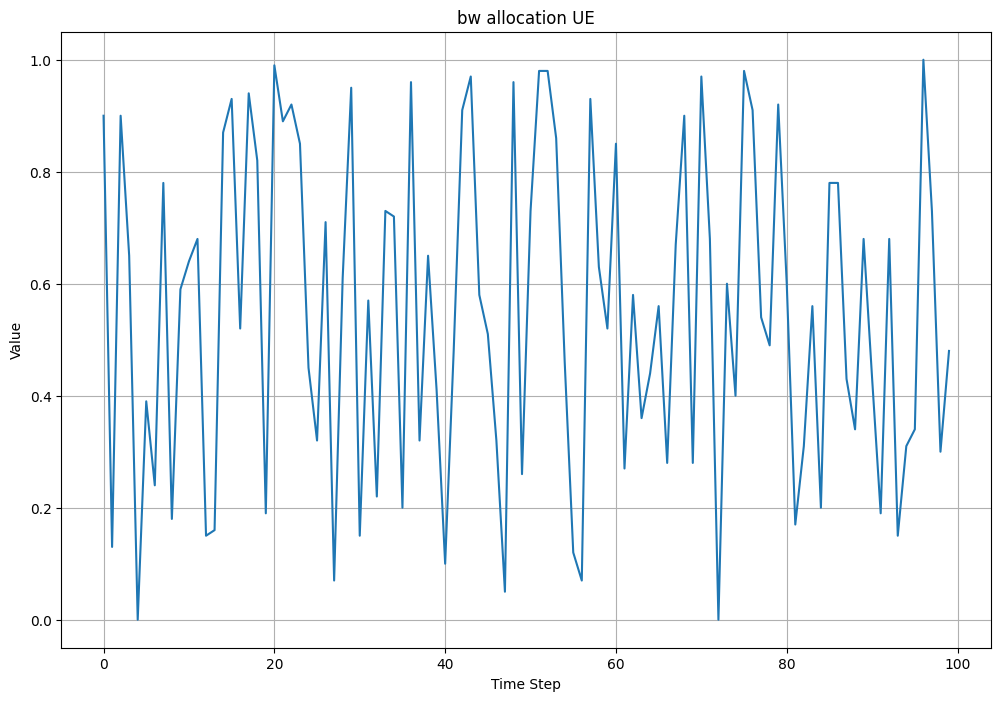

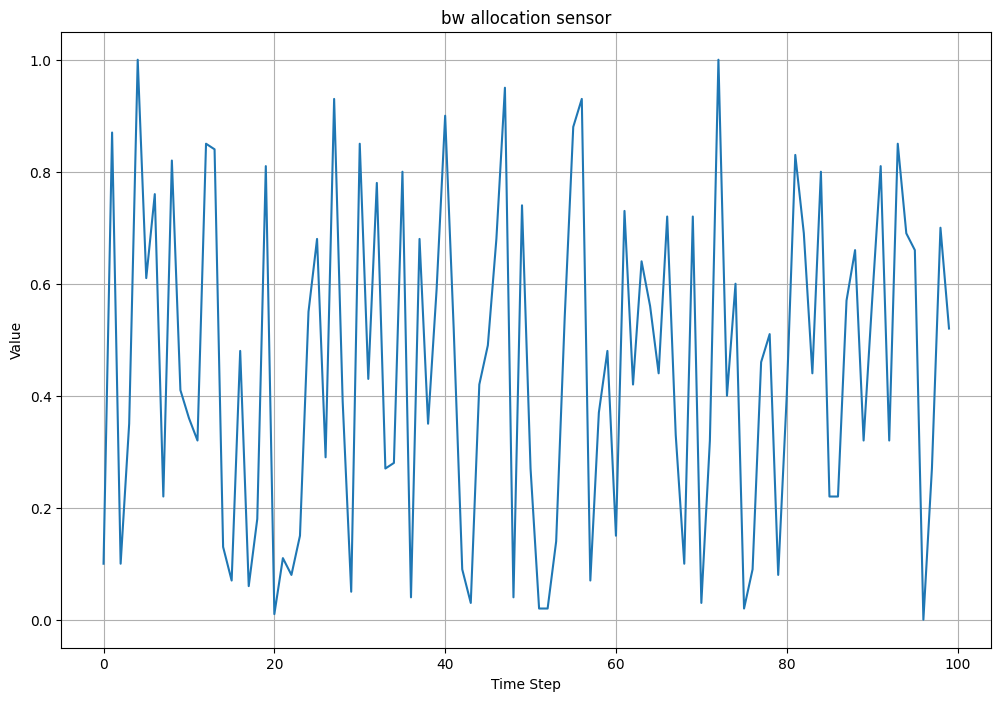

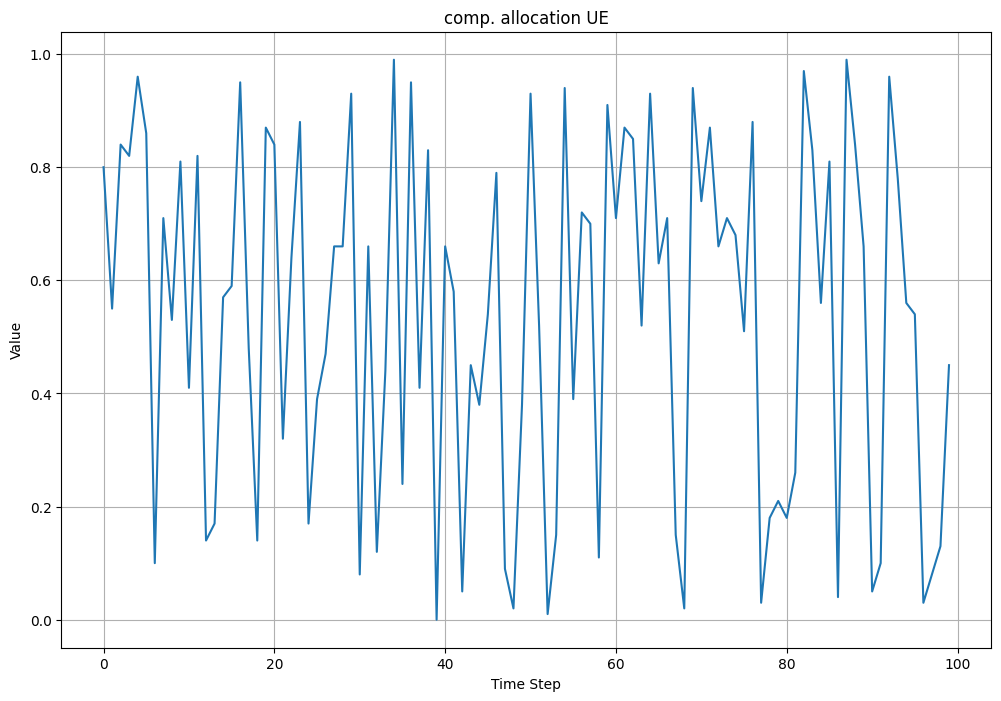

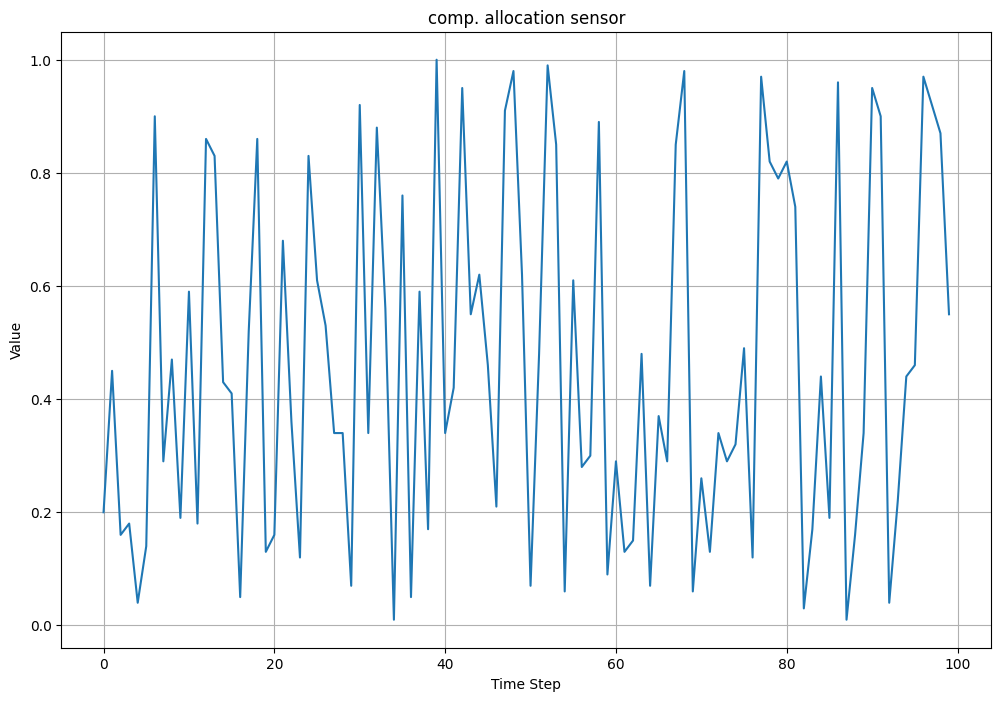

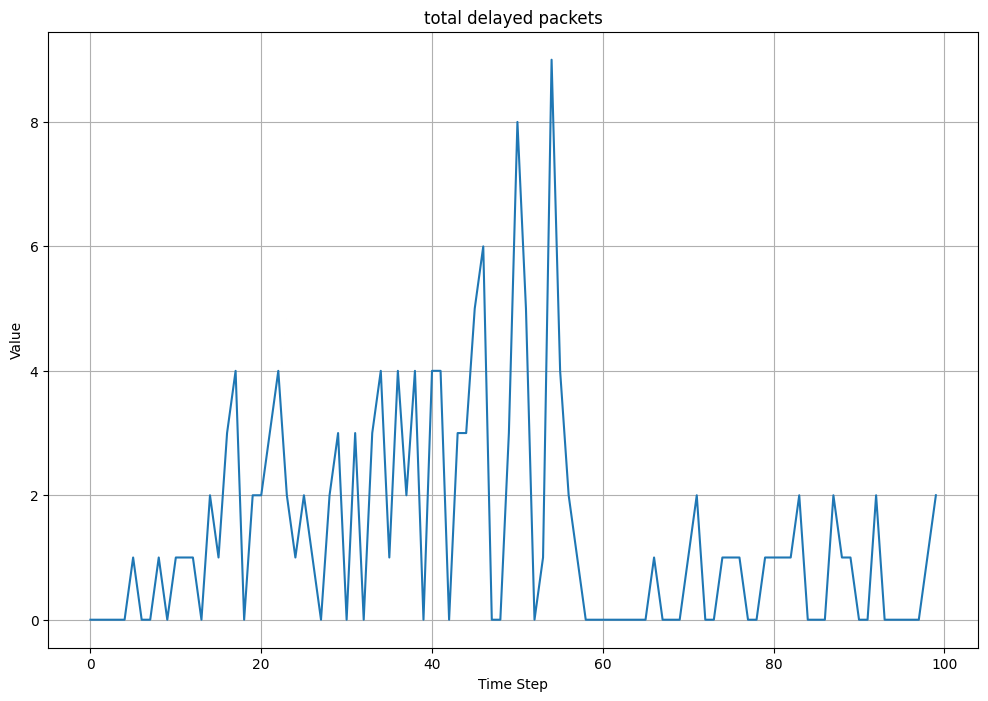

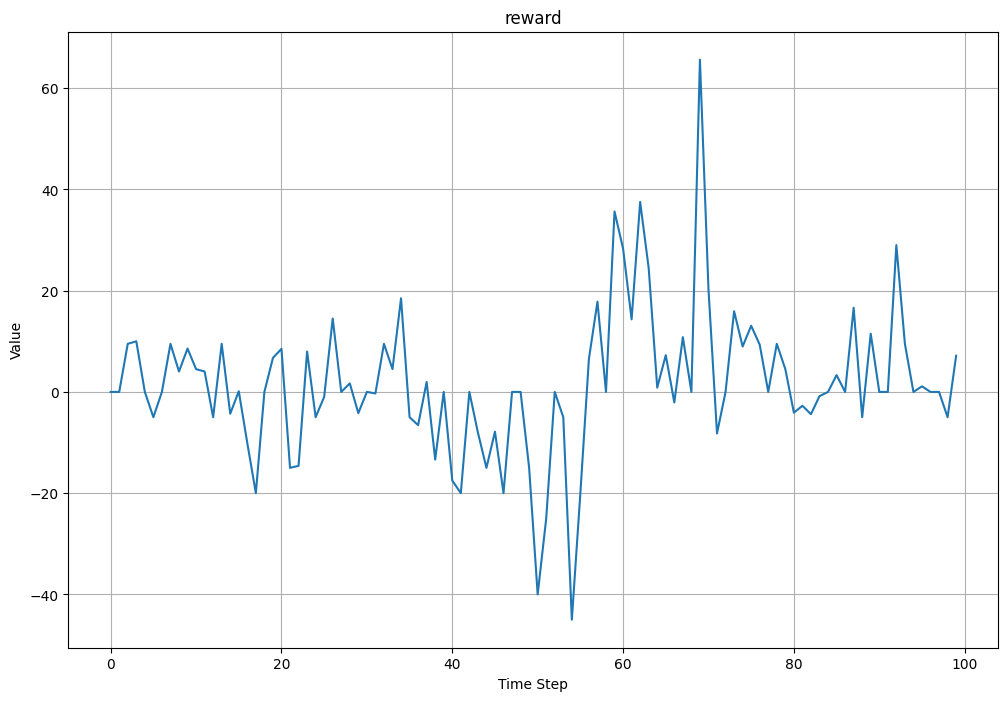

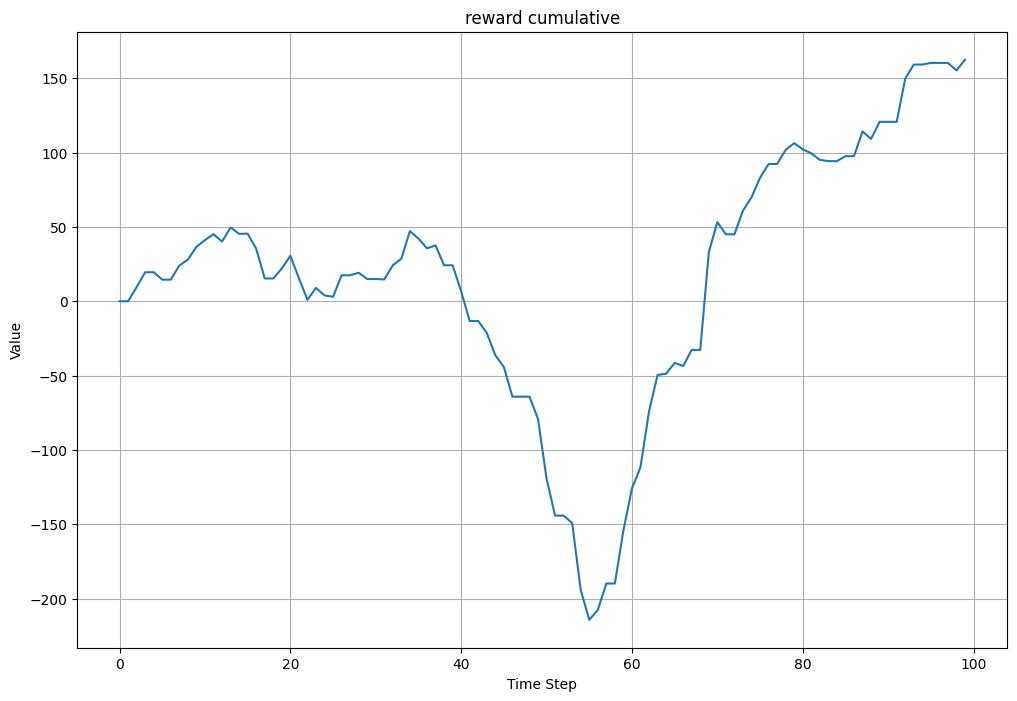

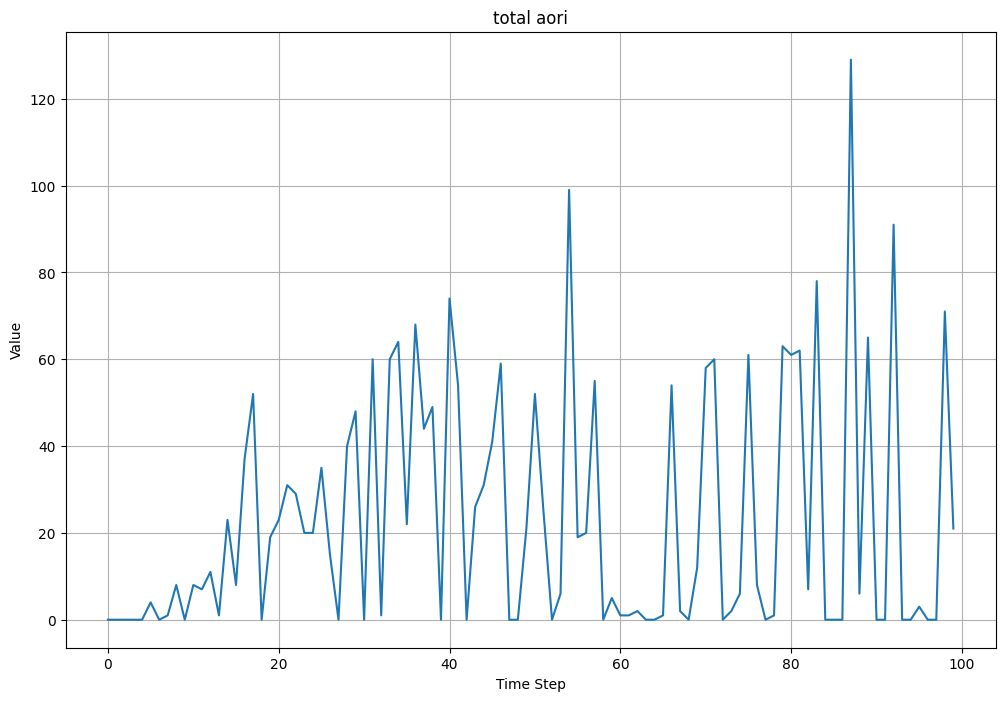

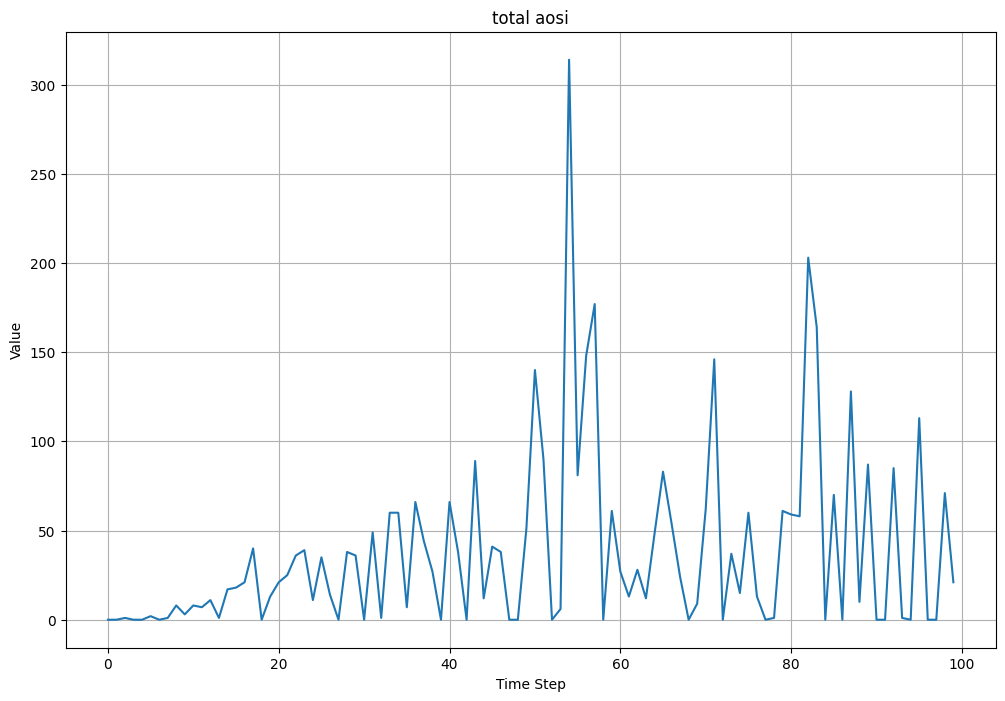

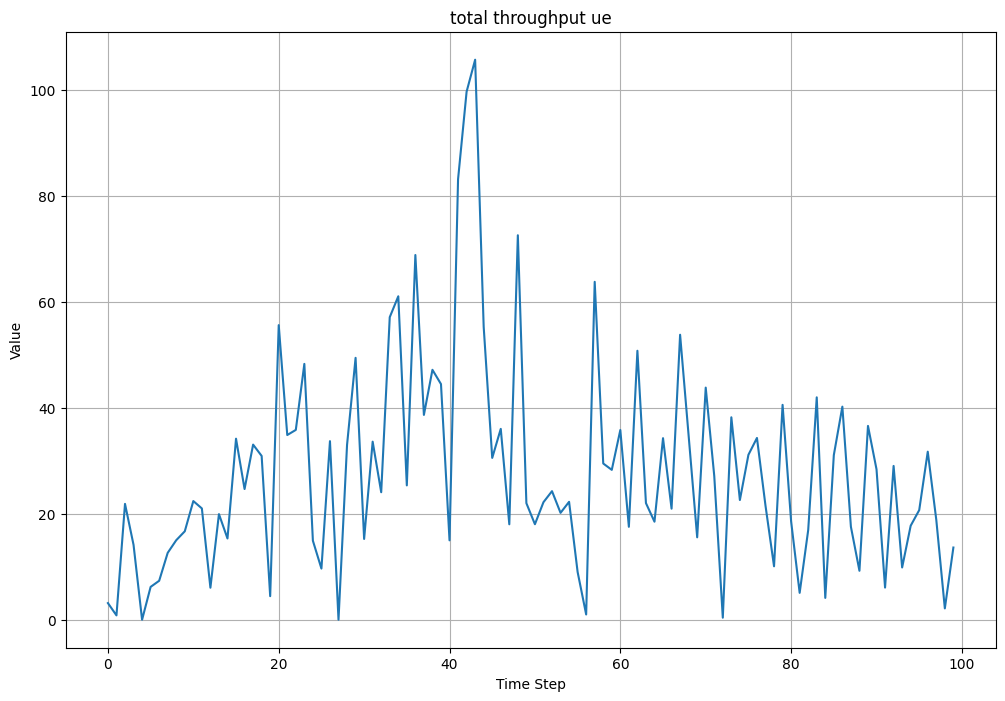

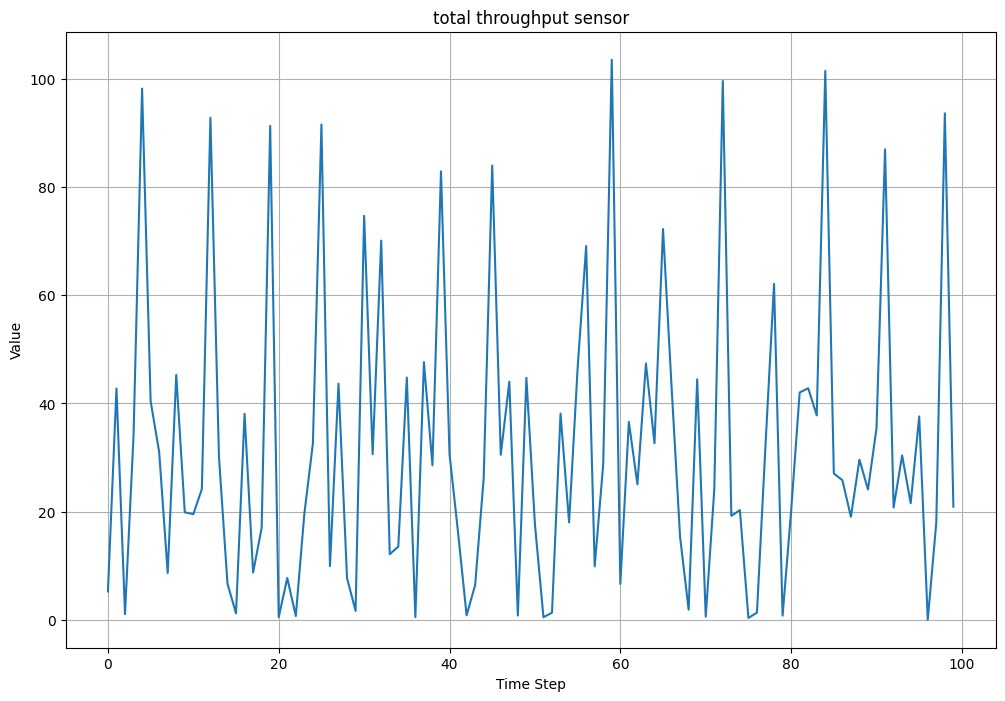

In [18]:
import matplotlib.pyplot as plt

def plot_kpi_metrics():
    # Plot kpi metrics
    for metric in kpi_results.columns:
        plt.figure(figsize=(12, 8))
        kpi_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_kpi_metrics()

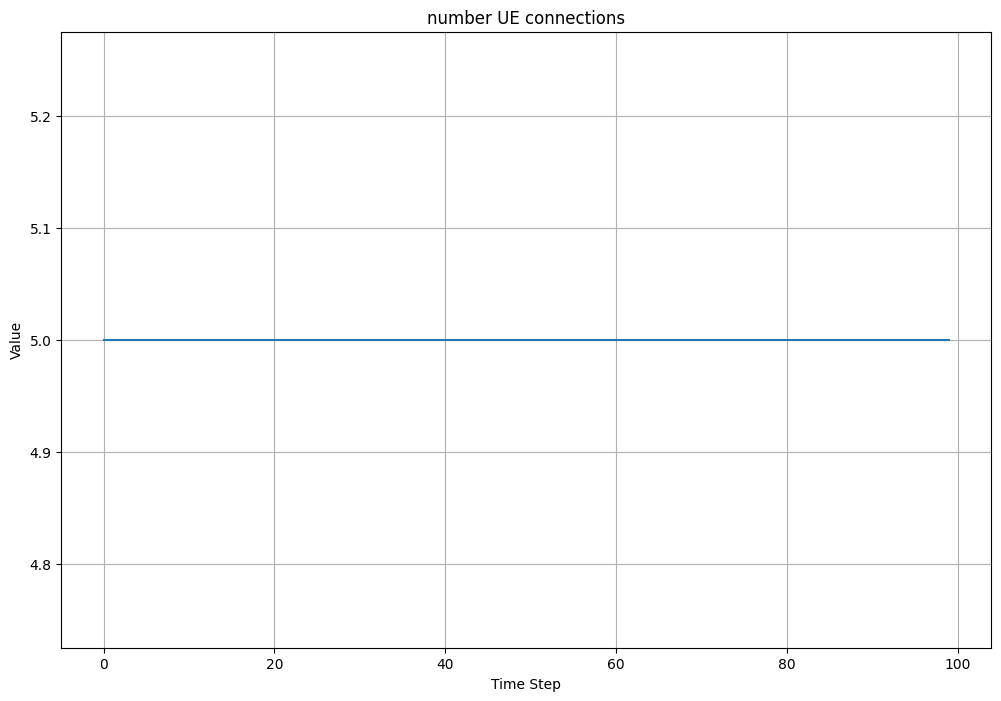

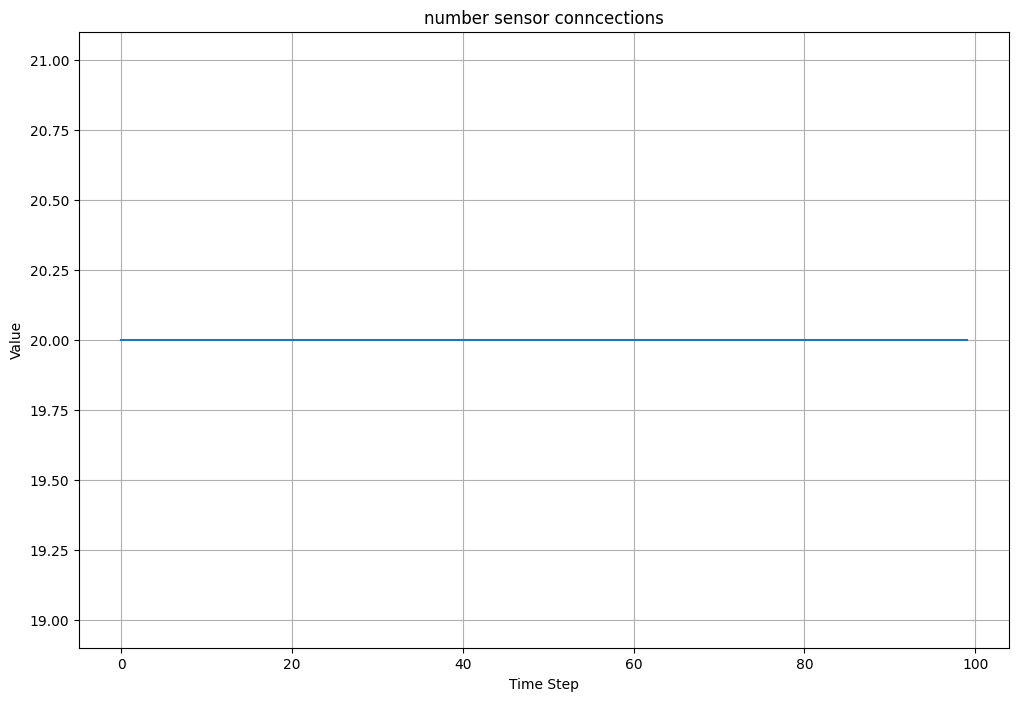

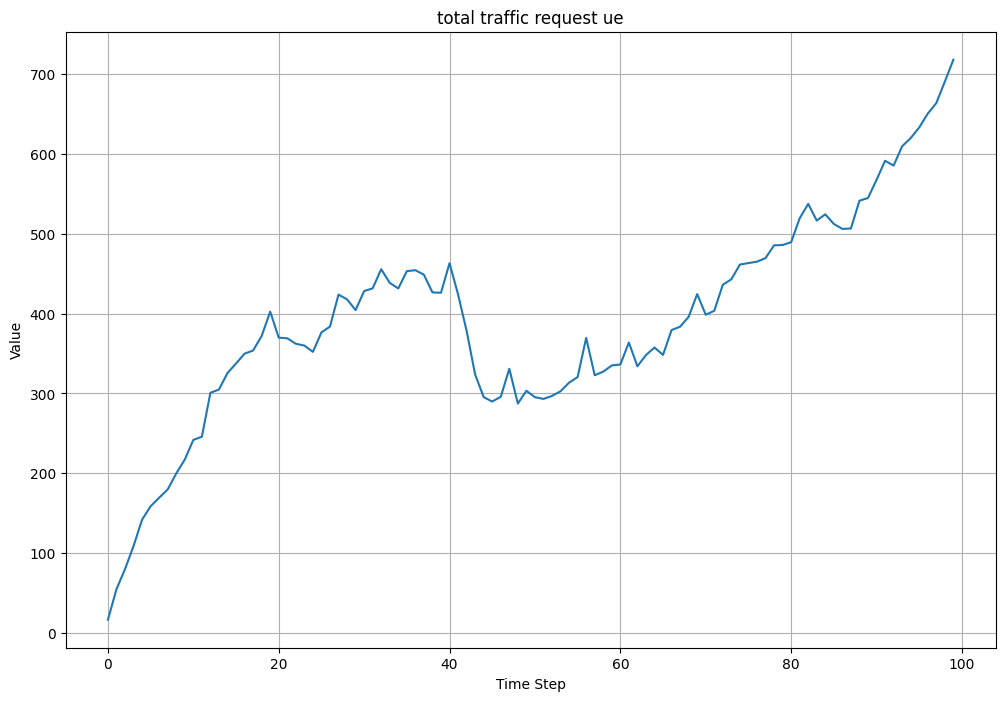

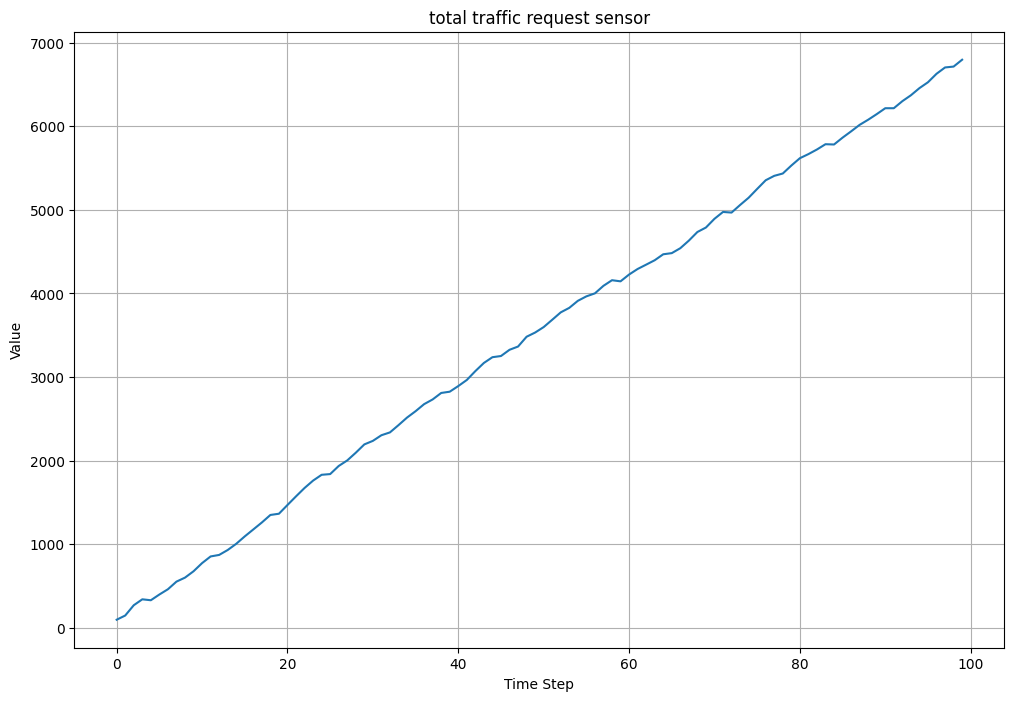

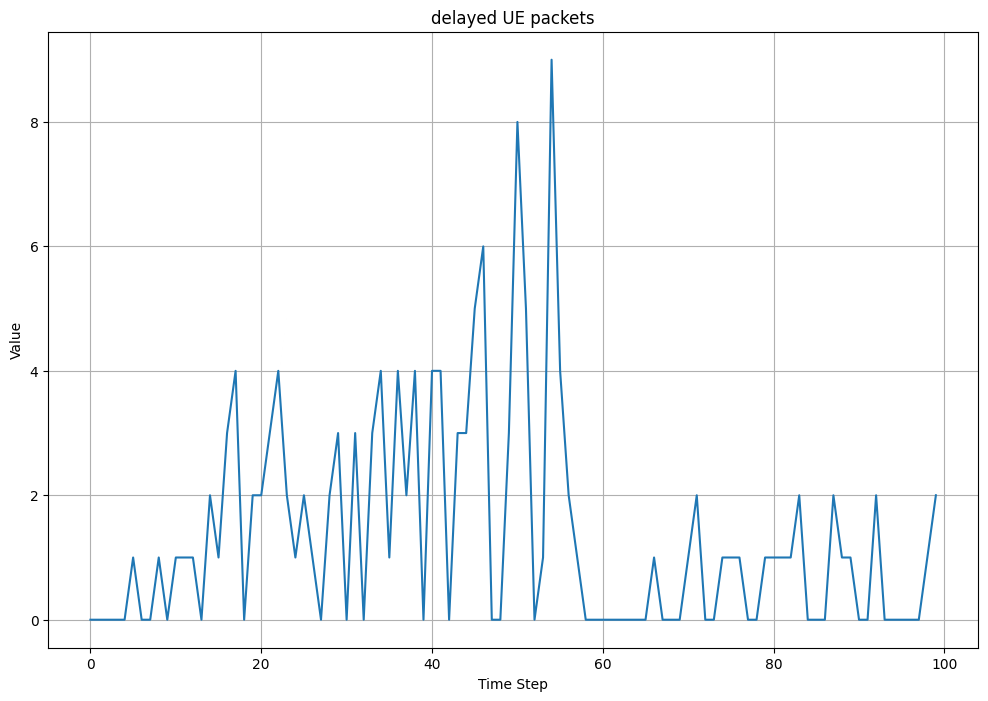

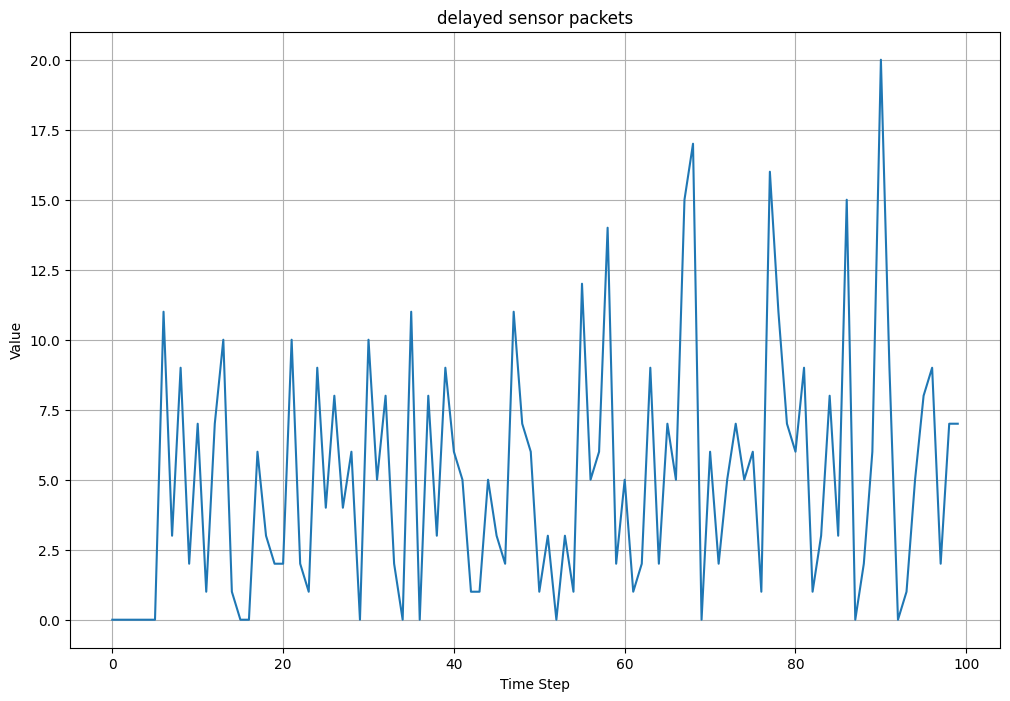

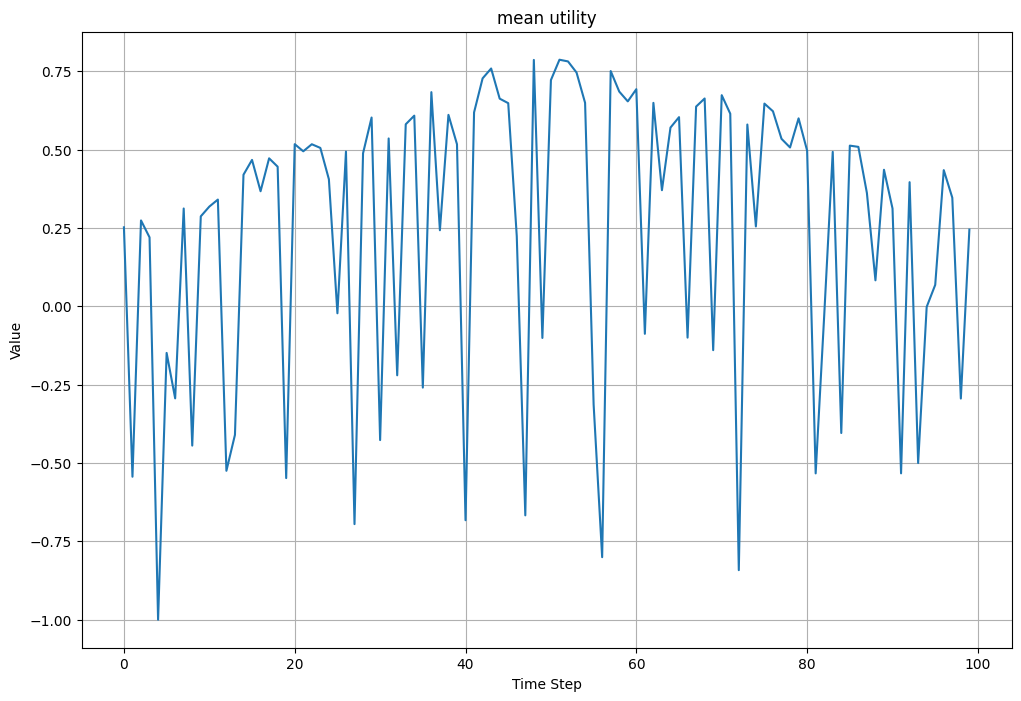

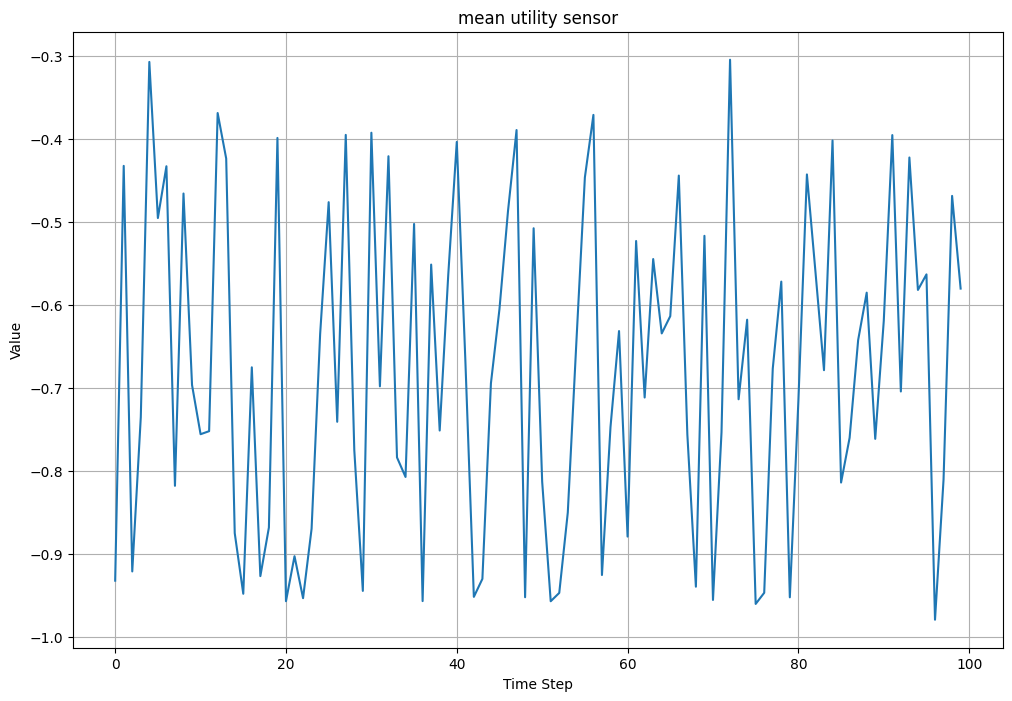

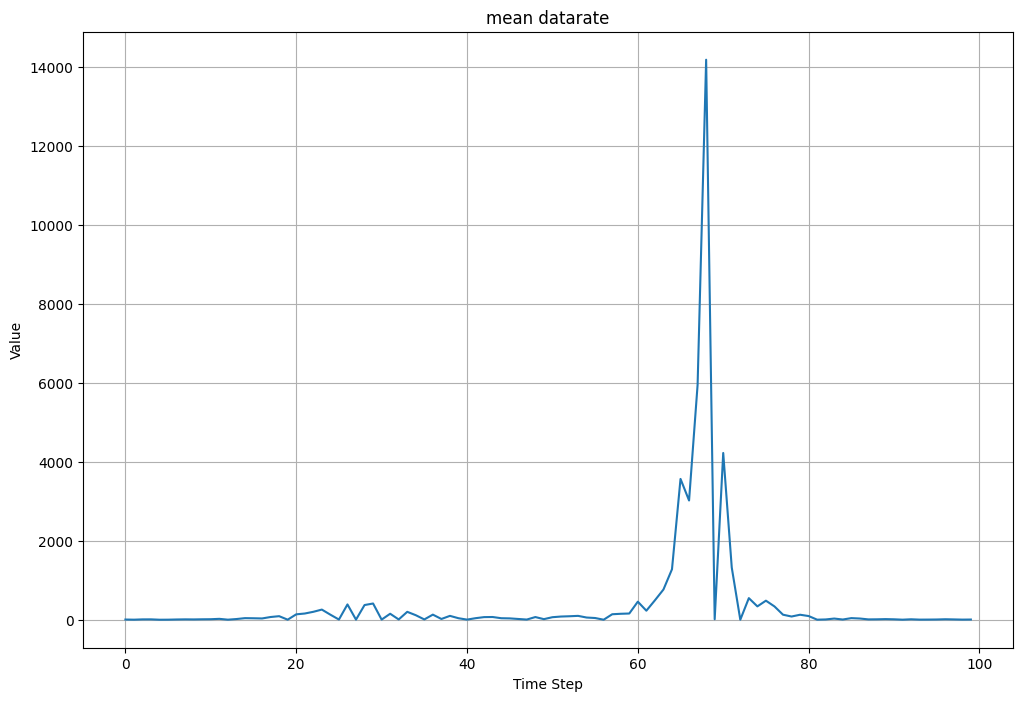

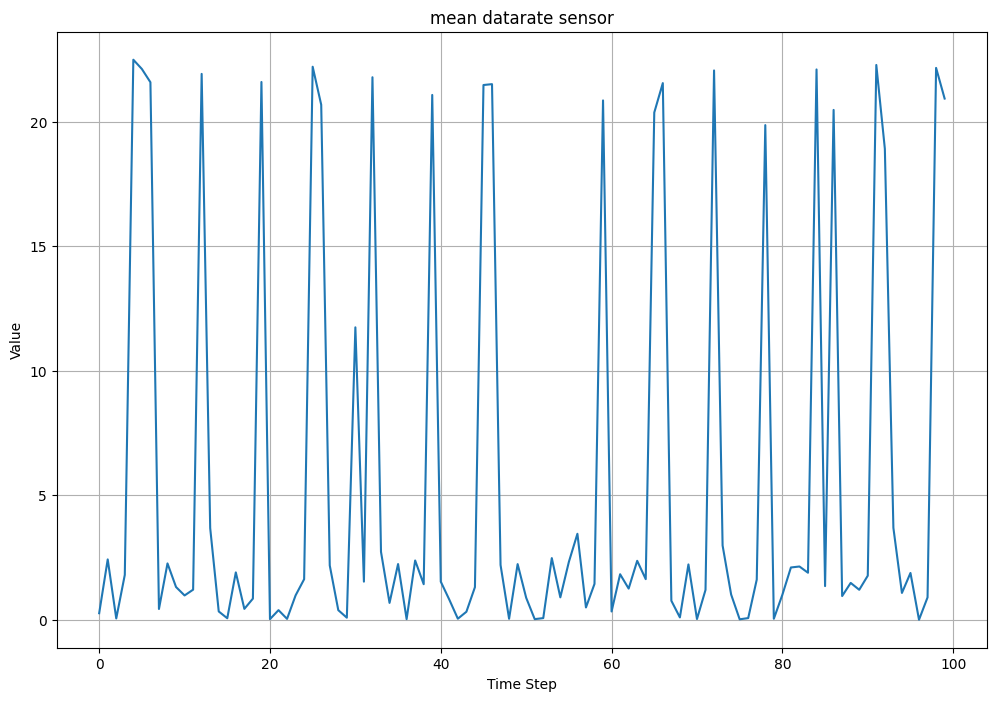

In [19]:
import matplotlib.pyplot as plt

def plot_scalar_metrics():
    # Plot scalar metrics
    for metric in scalar_results.columns:
        plt.figure(figsize=(12, 8))
        scalar_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_scalar_metrics()

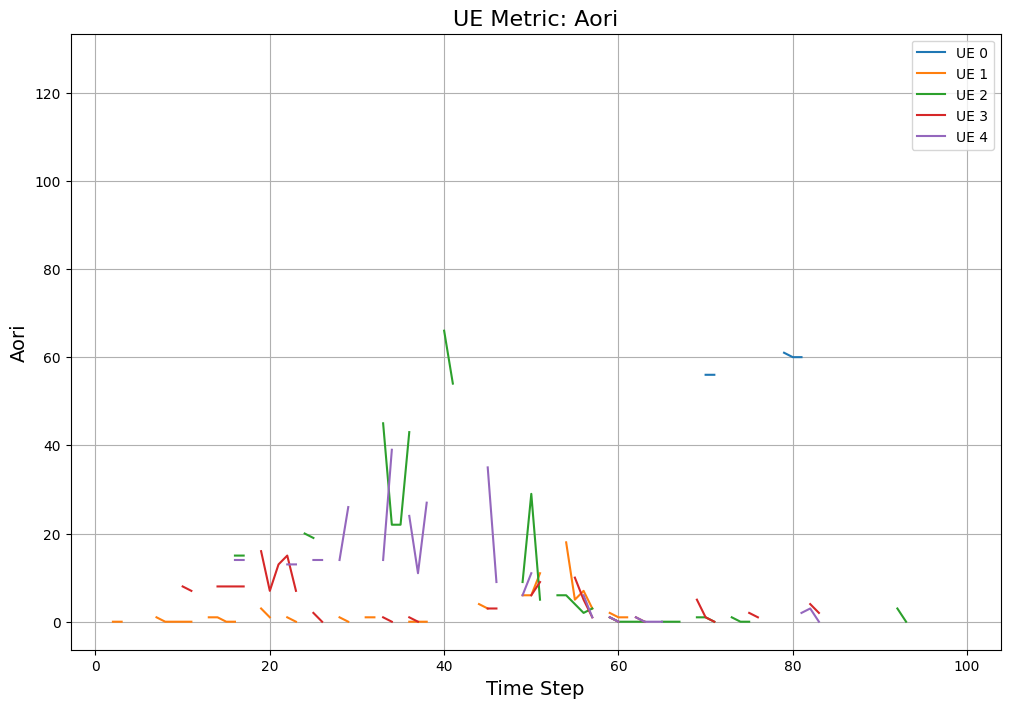

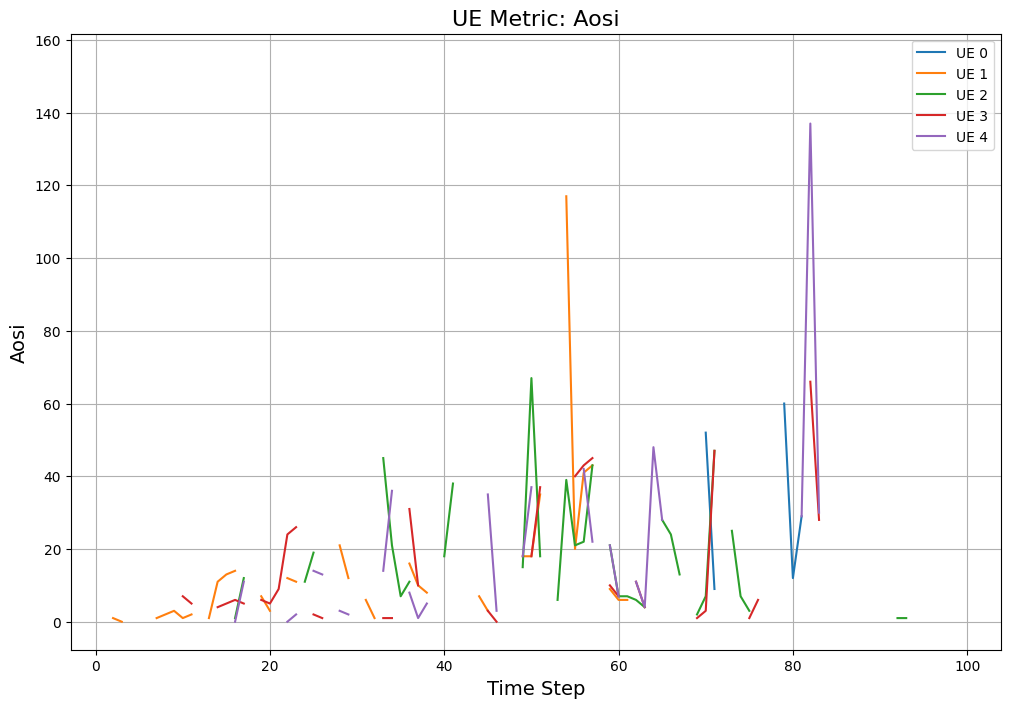

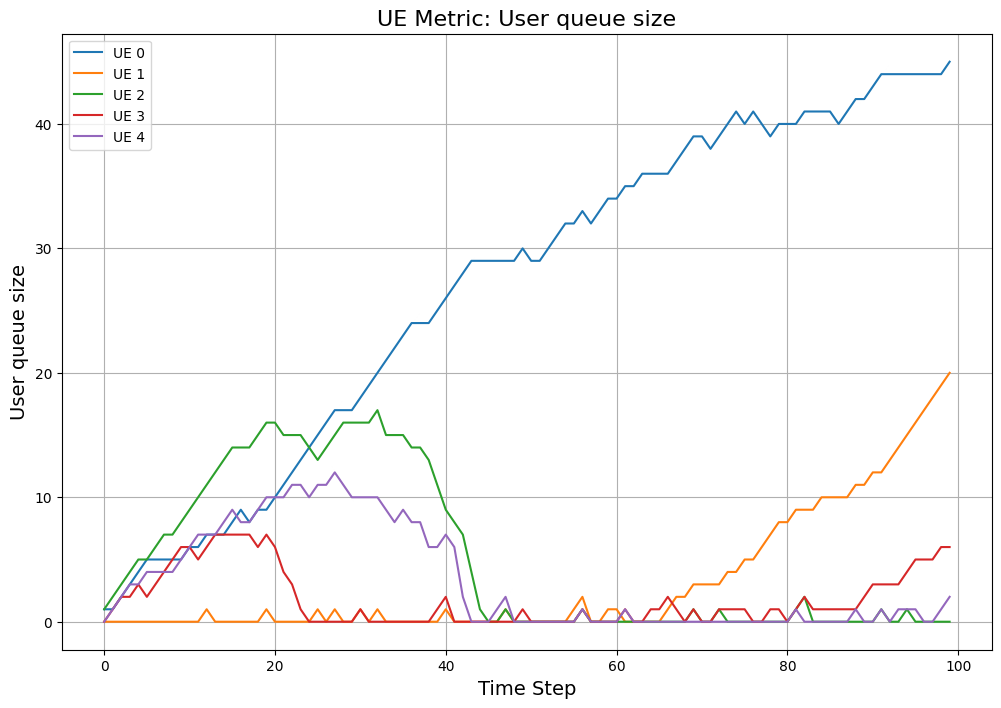

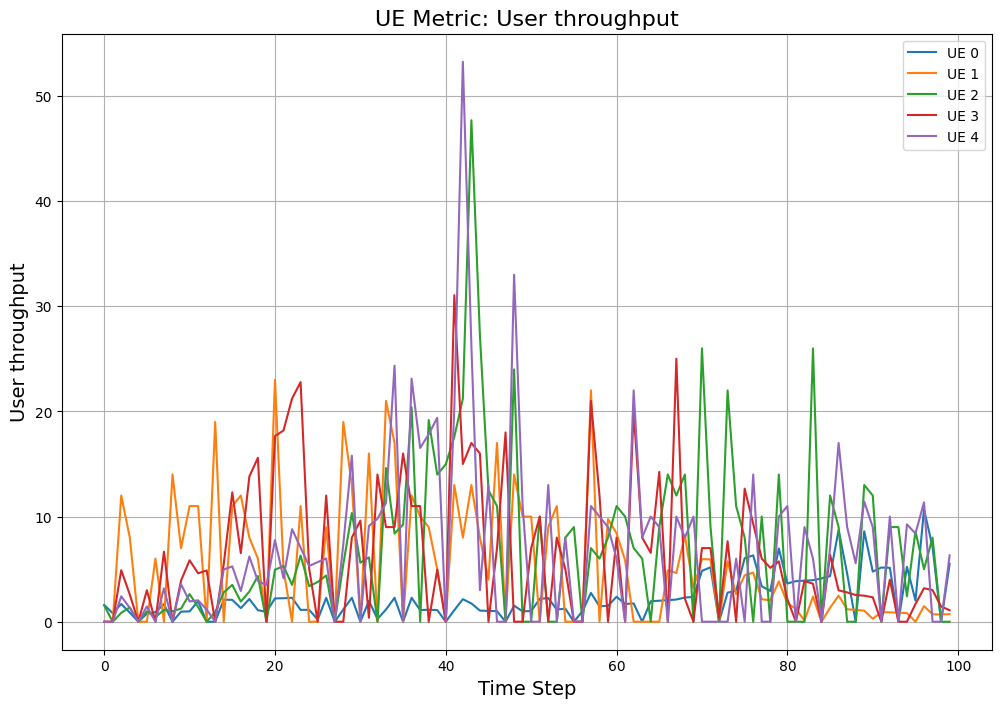

In [20]:
import matplotlib.pyplot as plt

def plot_ue_metrics(ue_results):
    required_metrics = ["user throughput", "user queue size", "AoRI", "AoSI"]
    available_metrics = [metric for metric in ue_results.columns if metric in required_metrics]

    for metric in available_metrics:
        plt.figure(figsize=(12, 8))
        
        for ue_id in ue_results.index.get_level_values("UE ID").unique():
            ue_data = ue_results.xs(ue_id, level="UE ID")[metric]
            plt.plot(ue_data.index, ue_data.values, label=f"UE {ue_id}")
            
        plt.title(f"UE Metric: {metric.capitalize()}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric.capitalize(), fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_ue_metrics(ue_results)

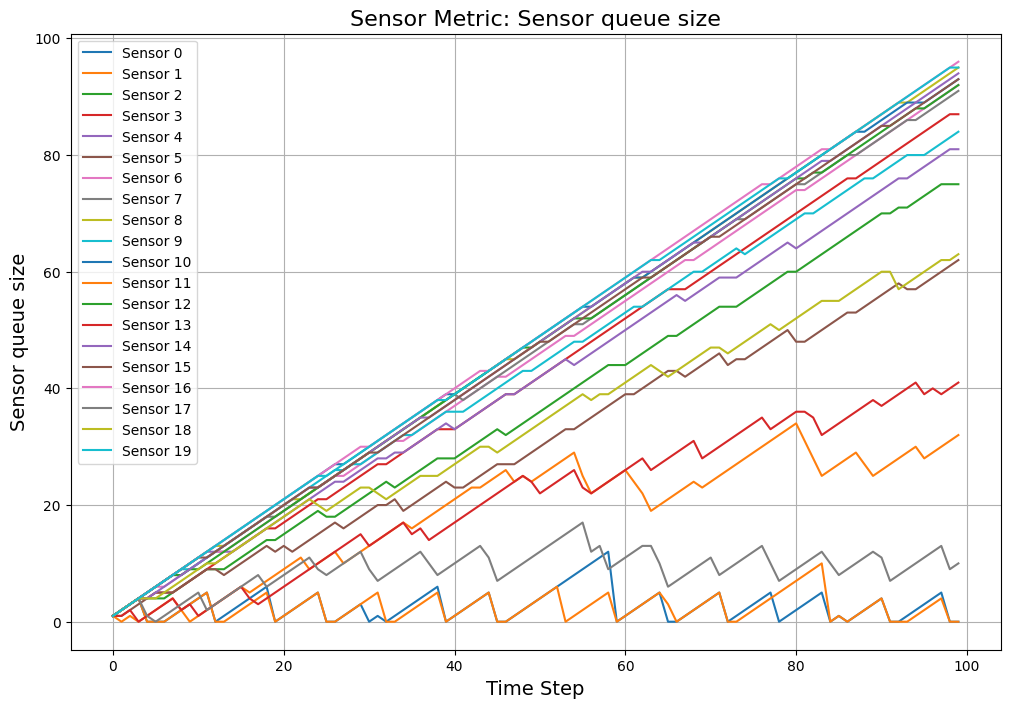

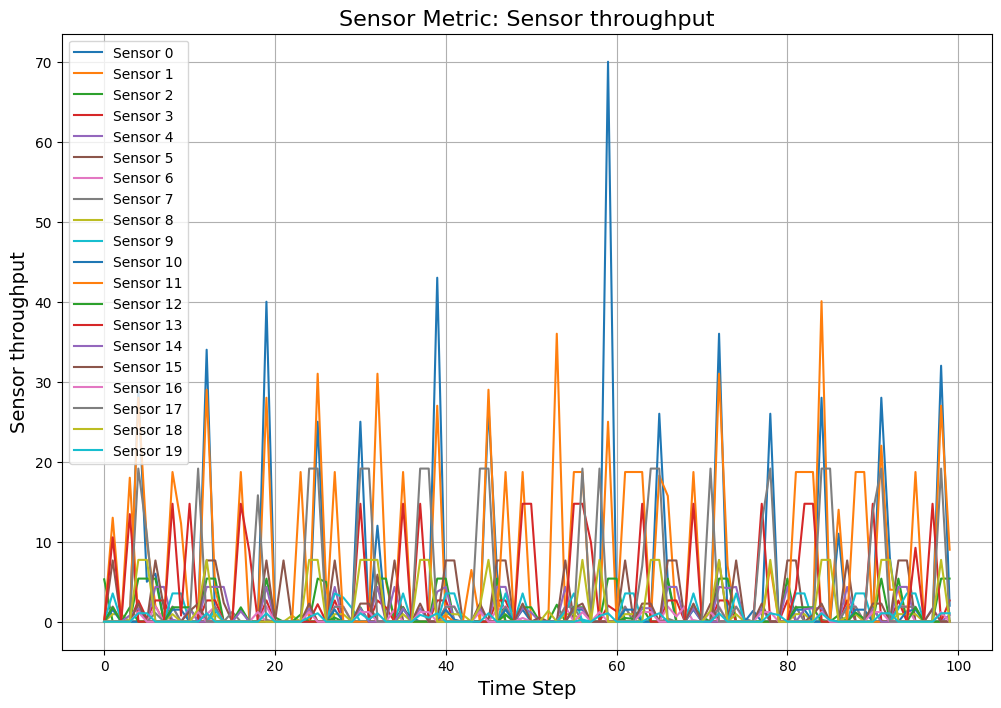

In [21]:
import matplotlib.pyplot as plt

def plot_sensor_metrics(ss_results):
    required_metrics = ["sensor throughput", "sensor queue size"]
    available_metrics = [metric for metric in ss_results.columns if metric in required_metrics]

    for metric in available_metrics:
        plt.figure(figsize=(12, 8))
        
        for sensor_id in ss_results.index.get_level_values("Sensor ID").unique():
            sensor_data = ss_results.xs(sensor_id, level="Sensor ID")[metric]
            plt.plot(sensor_data.index, sensor_data.values, label=f"Sensor {sensor_id}")
        
        plt.title(f"Sensor Metric: {metric.capitalize()}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric.capitalize(), fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_sensor_metrics(ss_results)

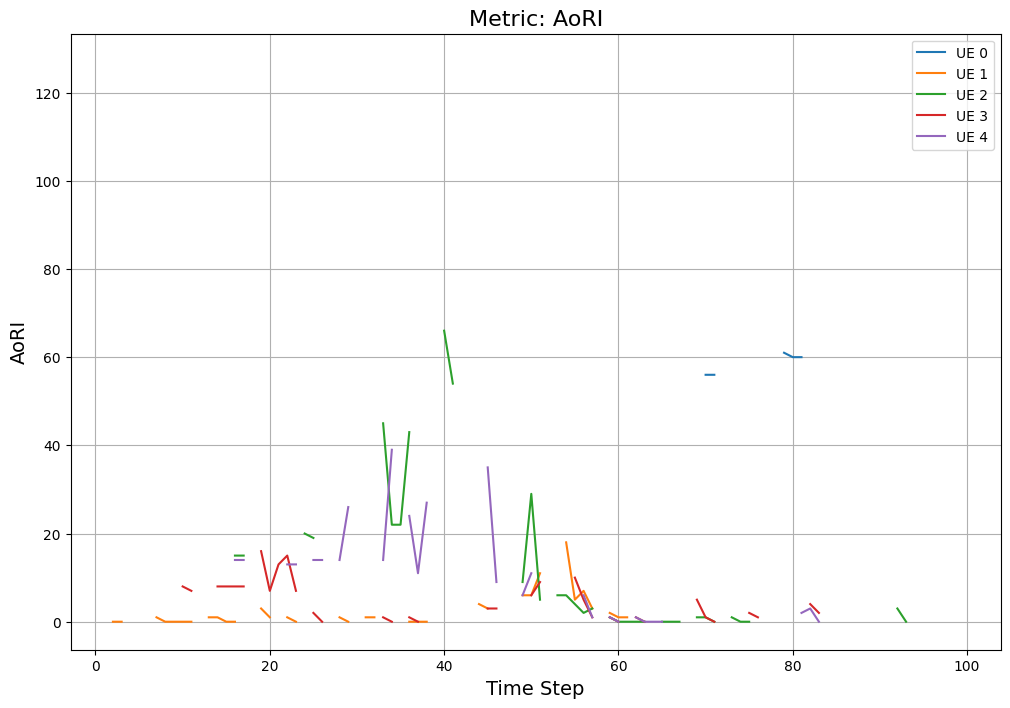

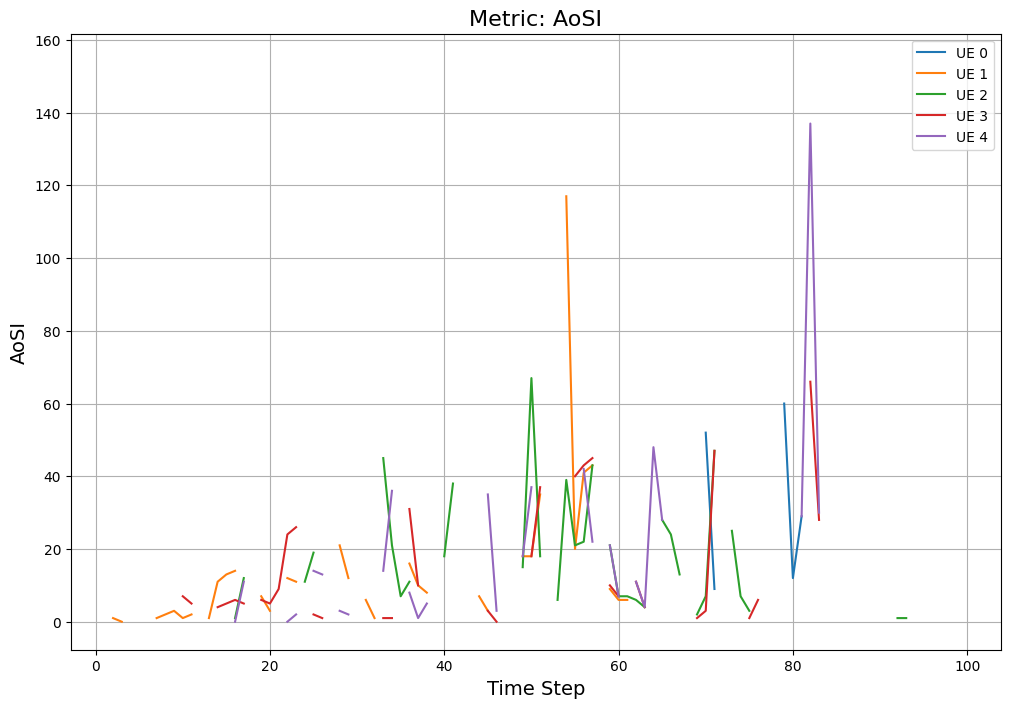

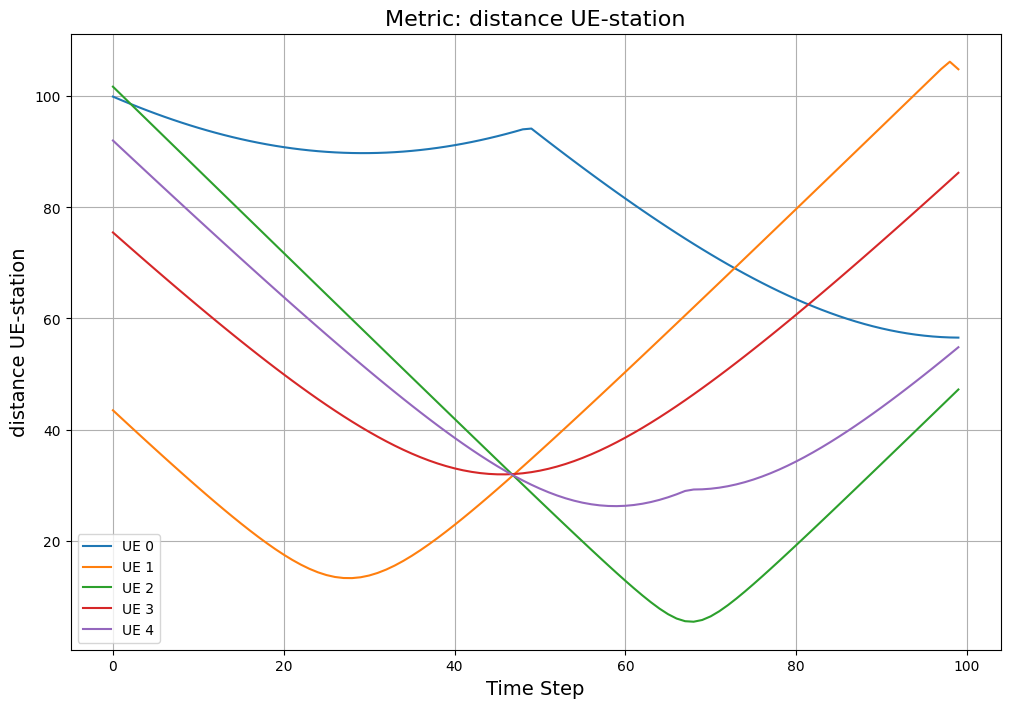

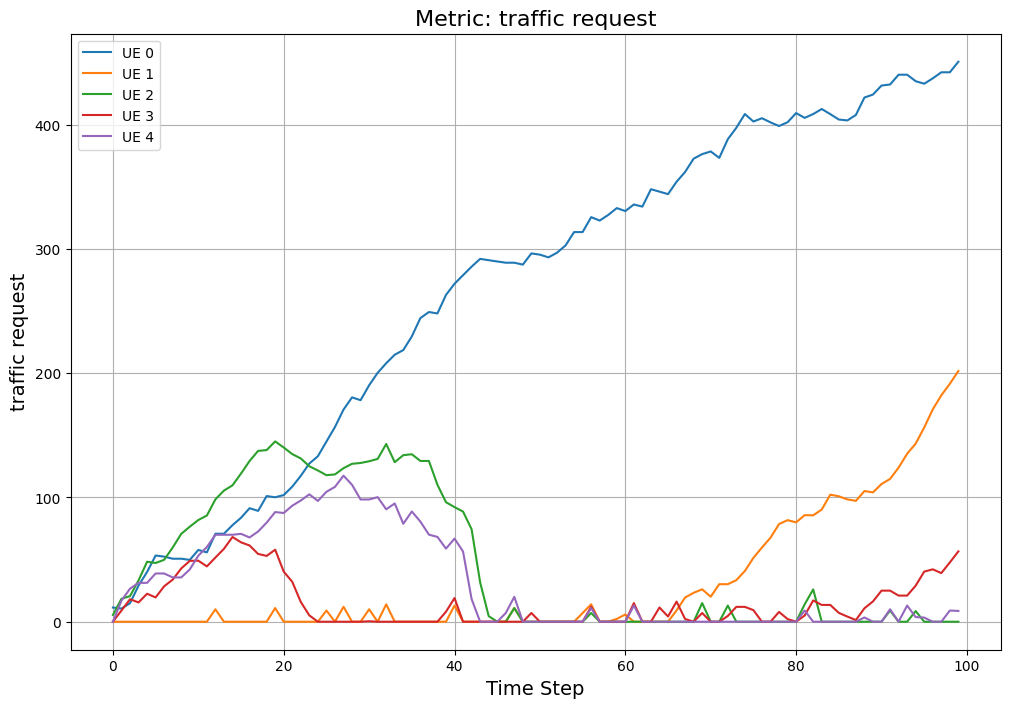

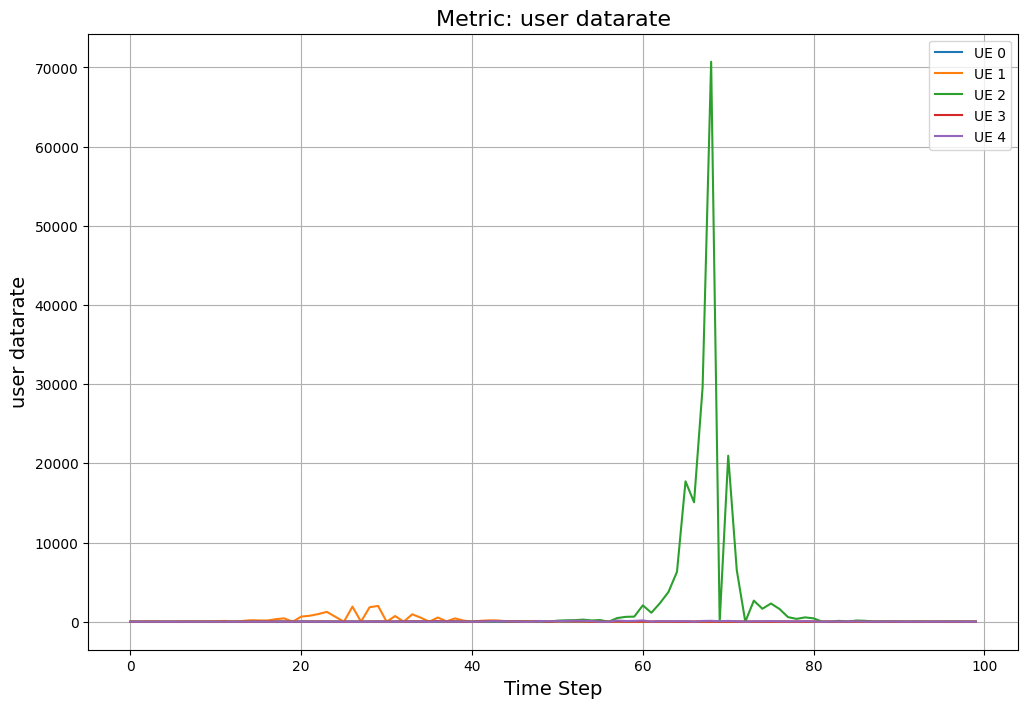

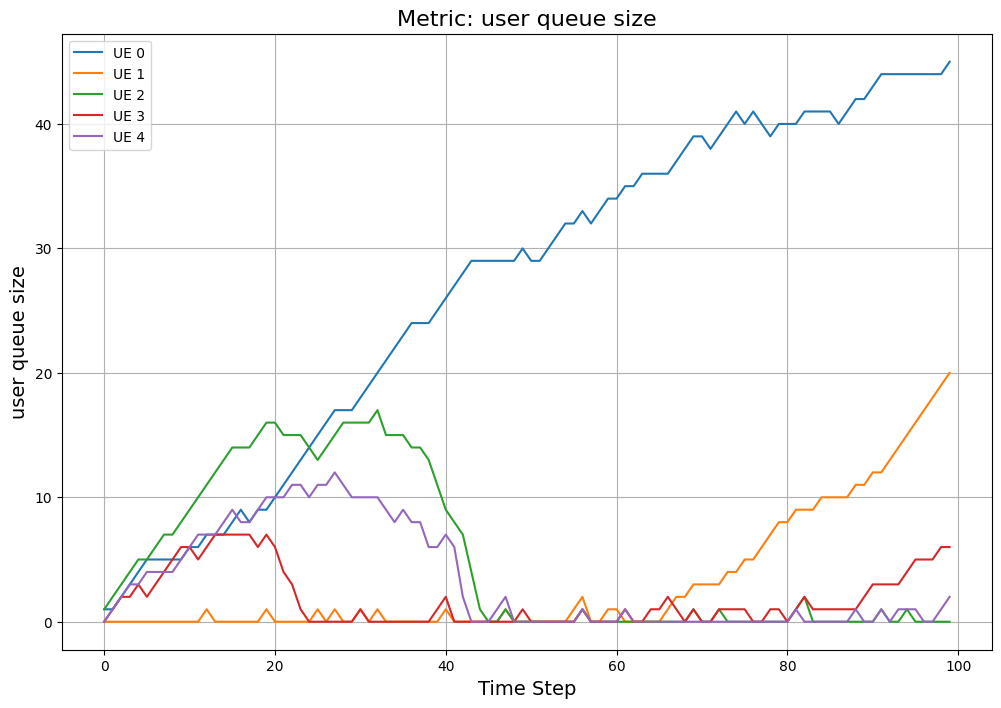

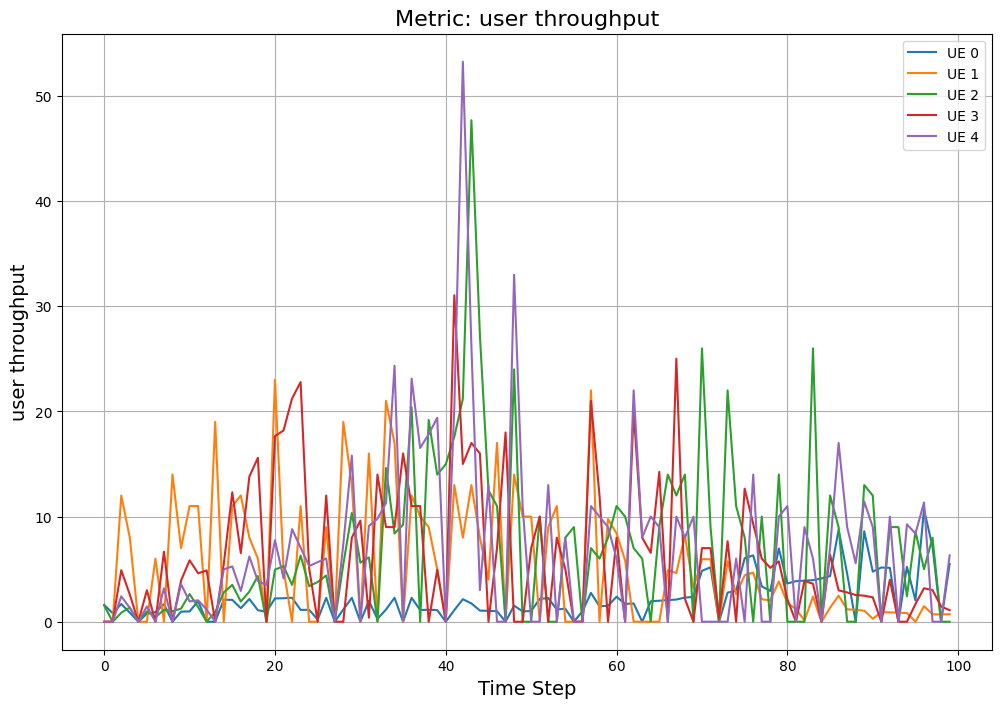

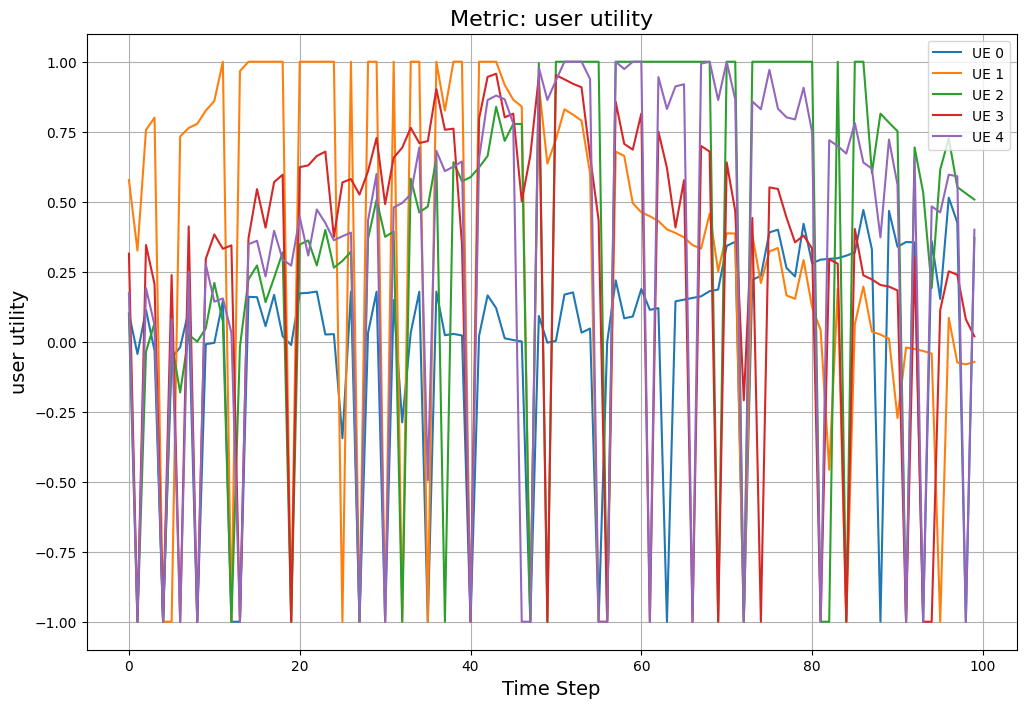

In [22]:
import matplotlib.pyplot as plt

def plot_all_ue_metrics(ue_results):
    for metric in ue_results.columns:
        plt.figure(figsize=(12, 8))
        
        for ue_id in ue_results.index.get_level_values("UE ID").unique():
            ue_data = ue_results.xs(ue_id, level="UE ID")[metric]
            plt.plot(ue_data.index, ue_data.values, label=f"UE {ue_id}")
        
        plt.title(f"Metric: {metric}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_all_ue_metrics(ue_results)

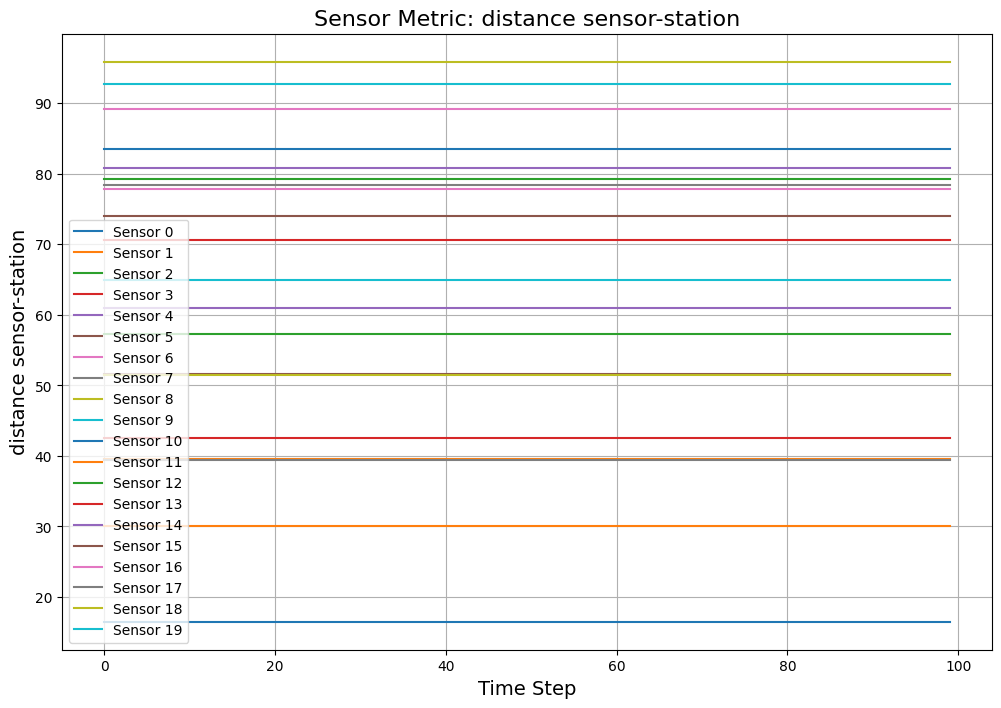

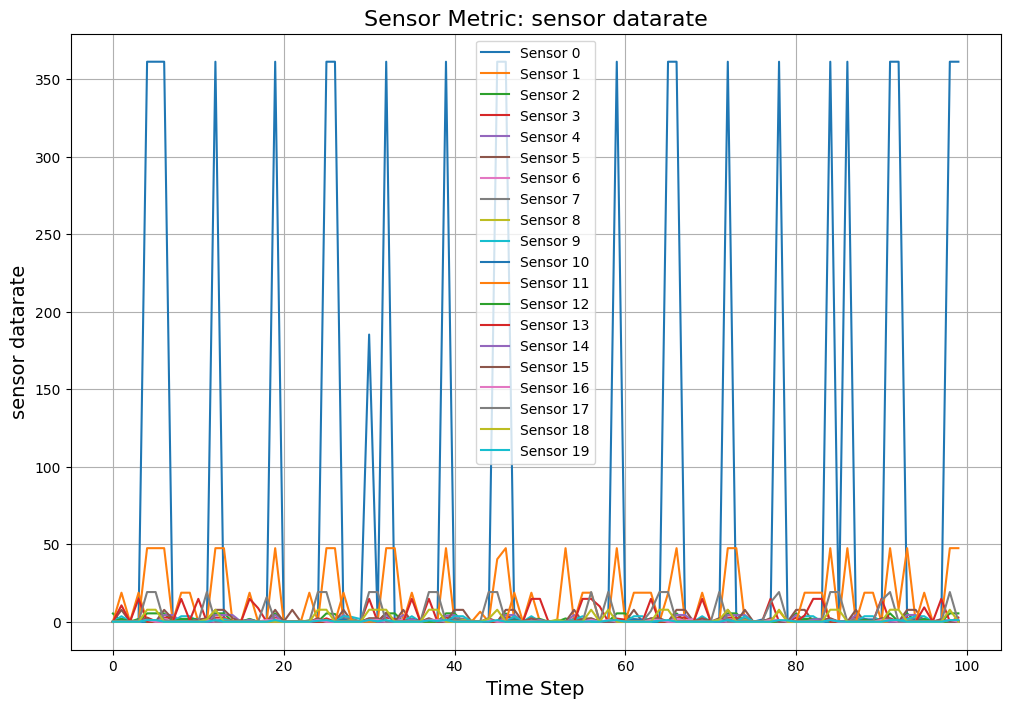

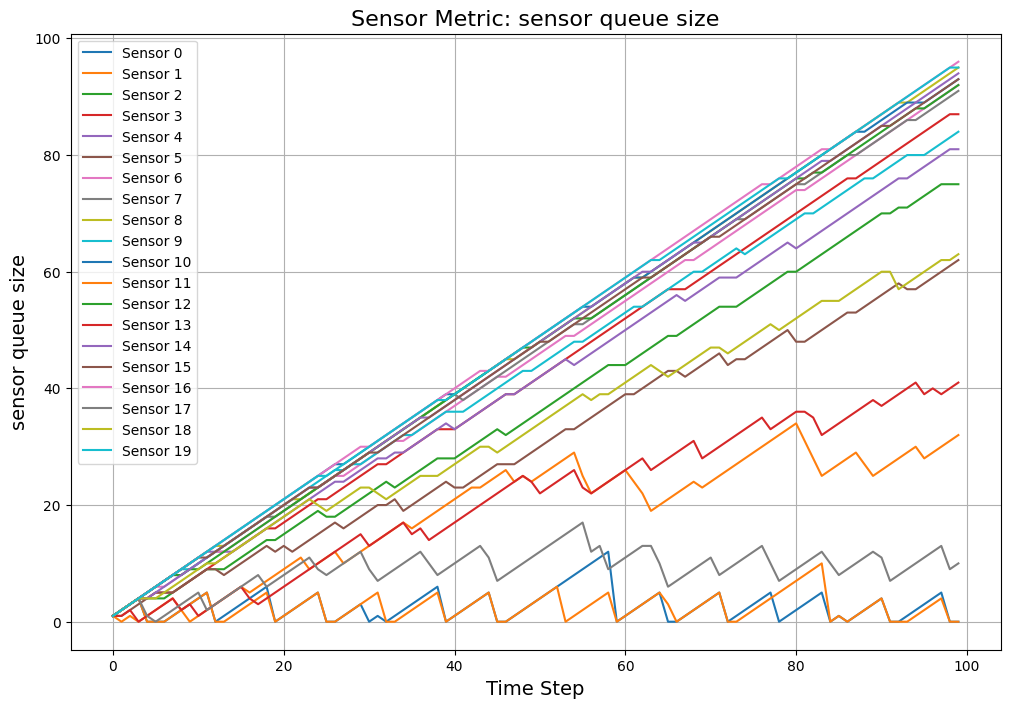

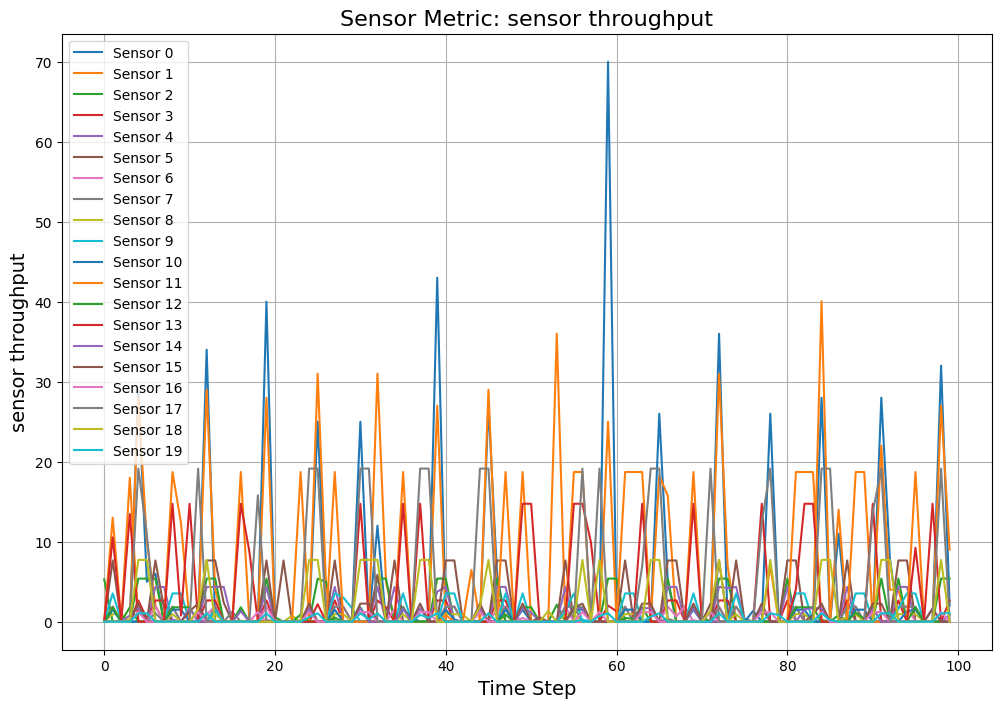

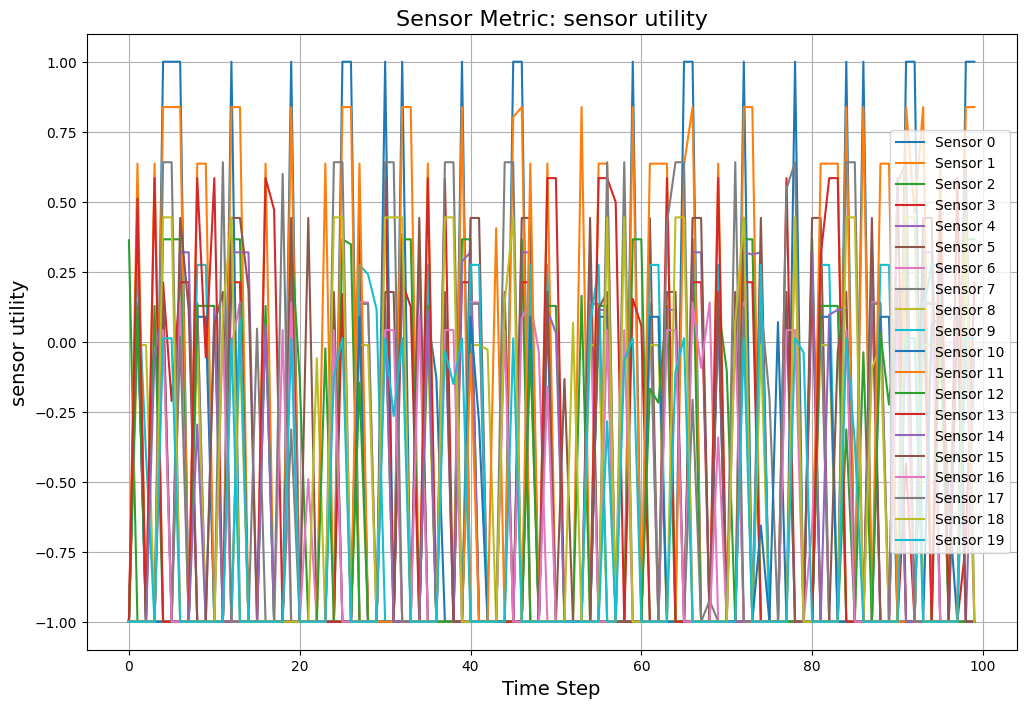

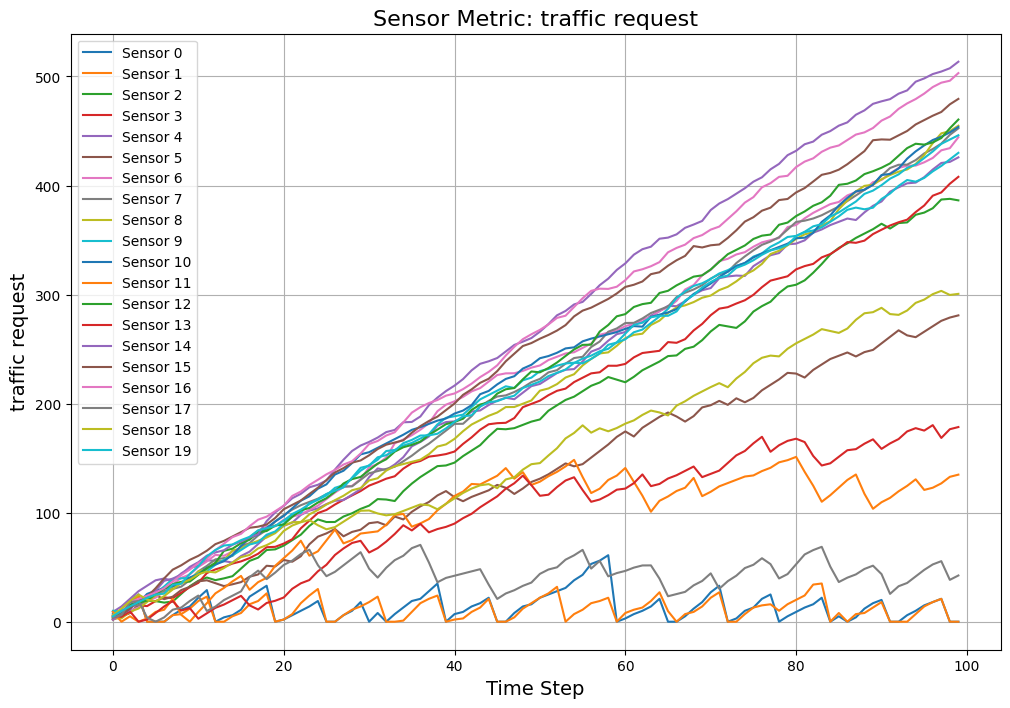

In [23]:
import matplotlib.pyplot as plt

def plot_all_sensor_metrics(ss_results):
    for metric in ss_results.columns:
        plt.figure(figsize=(12, 8))
    
        for sensor_id in ss_results.index.get_level_values("Sensor ID").unique():
            sensor_data = ss_results.xs(sensor_id, level="Sensor ID")[metric]
            plt.plot(sensor_data.index, sensor_data.values, label=f"Sensor {sensor_id}")
        
        plt.title(f"Sensor Metric: {metric}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_all_sensor_metrics(ss_results)